<a href="https://colab.research.google.com/github/minhnhat911/customer_satisfaction_DataAnalysis/blob/main/PhanTichSuHaiLongKH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git --version


git version 2.34.1


In [4]:
%cd customer_satisfaction_DataAnalysis
!git pull origin main


/content/customer_satisfaction_DataAnalysis
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 1.00 KiB | 170.00 KiB/s, done.
From https://github.com/minhnhat911/customer_satisfaction_DataAnalysis
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main


In [6]:
!ls /content



customer_satisfaction_DataAnalysis  sample_data


# <a name='Customer Satisfaction'></a>

<div style="border-radius:10px;
            background-color:pink;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
1. Import</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
from matplotlib import rcParams

# Thay đổi font chữ thành Times New Roman
rcParams['font.family'] = 'Times New Roman'

# Xử lý dữ liệu dạng bảng và ma trận
import pandas as pd
import numpy as np

# Trực quan hóa
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import random
#Trực quan hóa 3D
from mpl_toolkits.mplot3d import Axes3D

# Bỏ qua các cảnh báo
import warnings
warnings.filterwarnings('ignore')

#Tính toán chuyển các dữ liệu object thành số
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler #Chuẩn hóa dữ liệu

from sklearn.cluster import KMeans
#Tính toán chất lượng phân cụm
from sklearn.metrics import silhouette_score

#SVR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score






# <a name='Customer Satisfaction'></a>

<div style="border-radius:10px;
            background-color:lightgreen;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
2. Nhập và xử lý dữ liệu</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
#Nhập data Customer
df_PKhaoSat  = pd.read_csv("PhieuKhaoSat.csv")
df_PKhaoSat.head(10)

,Dấu thời gian,"Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?",1. Giới tính của anh/chị?,2. Độ tuổi của anh/chị?,3. Nghề nghiệp chính của anh/chị là?,4. Thu nhập hàng tháng của anh/chị?,5. Mức độ bận rộn công việc của anh/chị?,6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?,7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?,8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?,...,Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi chọn sử dụng một ứng dụng thay vì sử dụng một ứng dụng khác tương đồng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi sẽ mời những người khác sử dụng ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi dự định sẽ luôn sử dụng ứng dụng trong cuộc sống hàng ngày của mình.],Anh/chị nhận được phiếu khảo sát từ ai?,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,4/12/2024 5:58:21,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Từ 3 đến 5 triệu đồng,Ít bận rộn,beFood (be),Ít hơn 1 lần/tháng,Dưới 1 năm,...,3.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/13/2024 9:51:43,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,GoFood (Gojek),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,5.0,2.0,5.0,Quang Nhật,NaN,Có,0.0,NaN,NaN,NaN
2,4/13/2024 12:32:17,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Rất ít bận rộn,GoFood (Gojek),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,4.0,3.0,3.0,Quang Nhật,NaN,Không,0.0,NaN,NaN,NaN
3,4/13/2024 12:46:24,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,GoFood (Gojek),Ít hơn 1 lần/tháng,Từ 1 đến 2 năm,...,2.0,3.0,3.0,Quang Nhật,NaN,NaN,0.0,NaN,NaN,NaN
4,4/13/2024 12:48:15,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,ShopeeFood (Shopee),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,3.0,4.0,4.0,Quang Nhật,NaN,NaN,NaN,NaN,NaN,NaN
5,4/13/2024 12:49:03,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,GoFood (Gojek),Từ 1 đến 2 lần/tháng,Từ 1 đến 2 năm,...,2.0,2.0,3.0,Quang Nhật,NaN,NaN,NaN,NaN,NaN,NaN
6,4/13/2024 12:53:12,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,ShopeeFood (Shopee),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,4.0,4.0,4.0,Quang Nhật,NaN,NaN,NaN,NaN,NaN,NaN
7,4/13/2024 12:53:26,Không,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Khác,NaN,NaN,NaN,NaN,NaN,NaN
8,4/13/2024 12:54:42,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,beFood (be),Từ 1 đến 2 lần/tháng,Từ 1 đến 2 năm,...,5.0,5.0,5.0,Quang Nhật,NaN,NaN,NaN,NaN,NaN,NaN
9,4/13/2024 12:58:30,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,beFood (be),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,5.0,5.0,5.0,Quang Nhật,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_PKhaoSat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 45 columns):
 #   Column                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                              --------------  -----  
 0   Dấu thời gian                                                                                                                                       368 non-null    object 
 1   Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                     368 non-null    object 
 2   1. Giới tính của anh/chị?                                                                                                                           318 non-null    object 
 3   2. Độ

In [ ]:
#check giá trị thiếu trong dataframe
df_PKhaoSat.isnull().sum()


Dấu thời gian                                                                                                                                           0
Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                         0
1. Giới tính của anh/chị?                                                                                                                              50
2. Độ tuổi của anh/chị?                                                                                                                                50
3. Nghề nghiệp chính của anh/chị là?                                                                                                                   50
4. Thu nhập hàng tháng của anh/chị?                                                                                                                    50
5. Mức độ bận rộn công việc của anh/chị?                                    

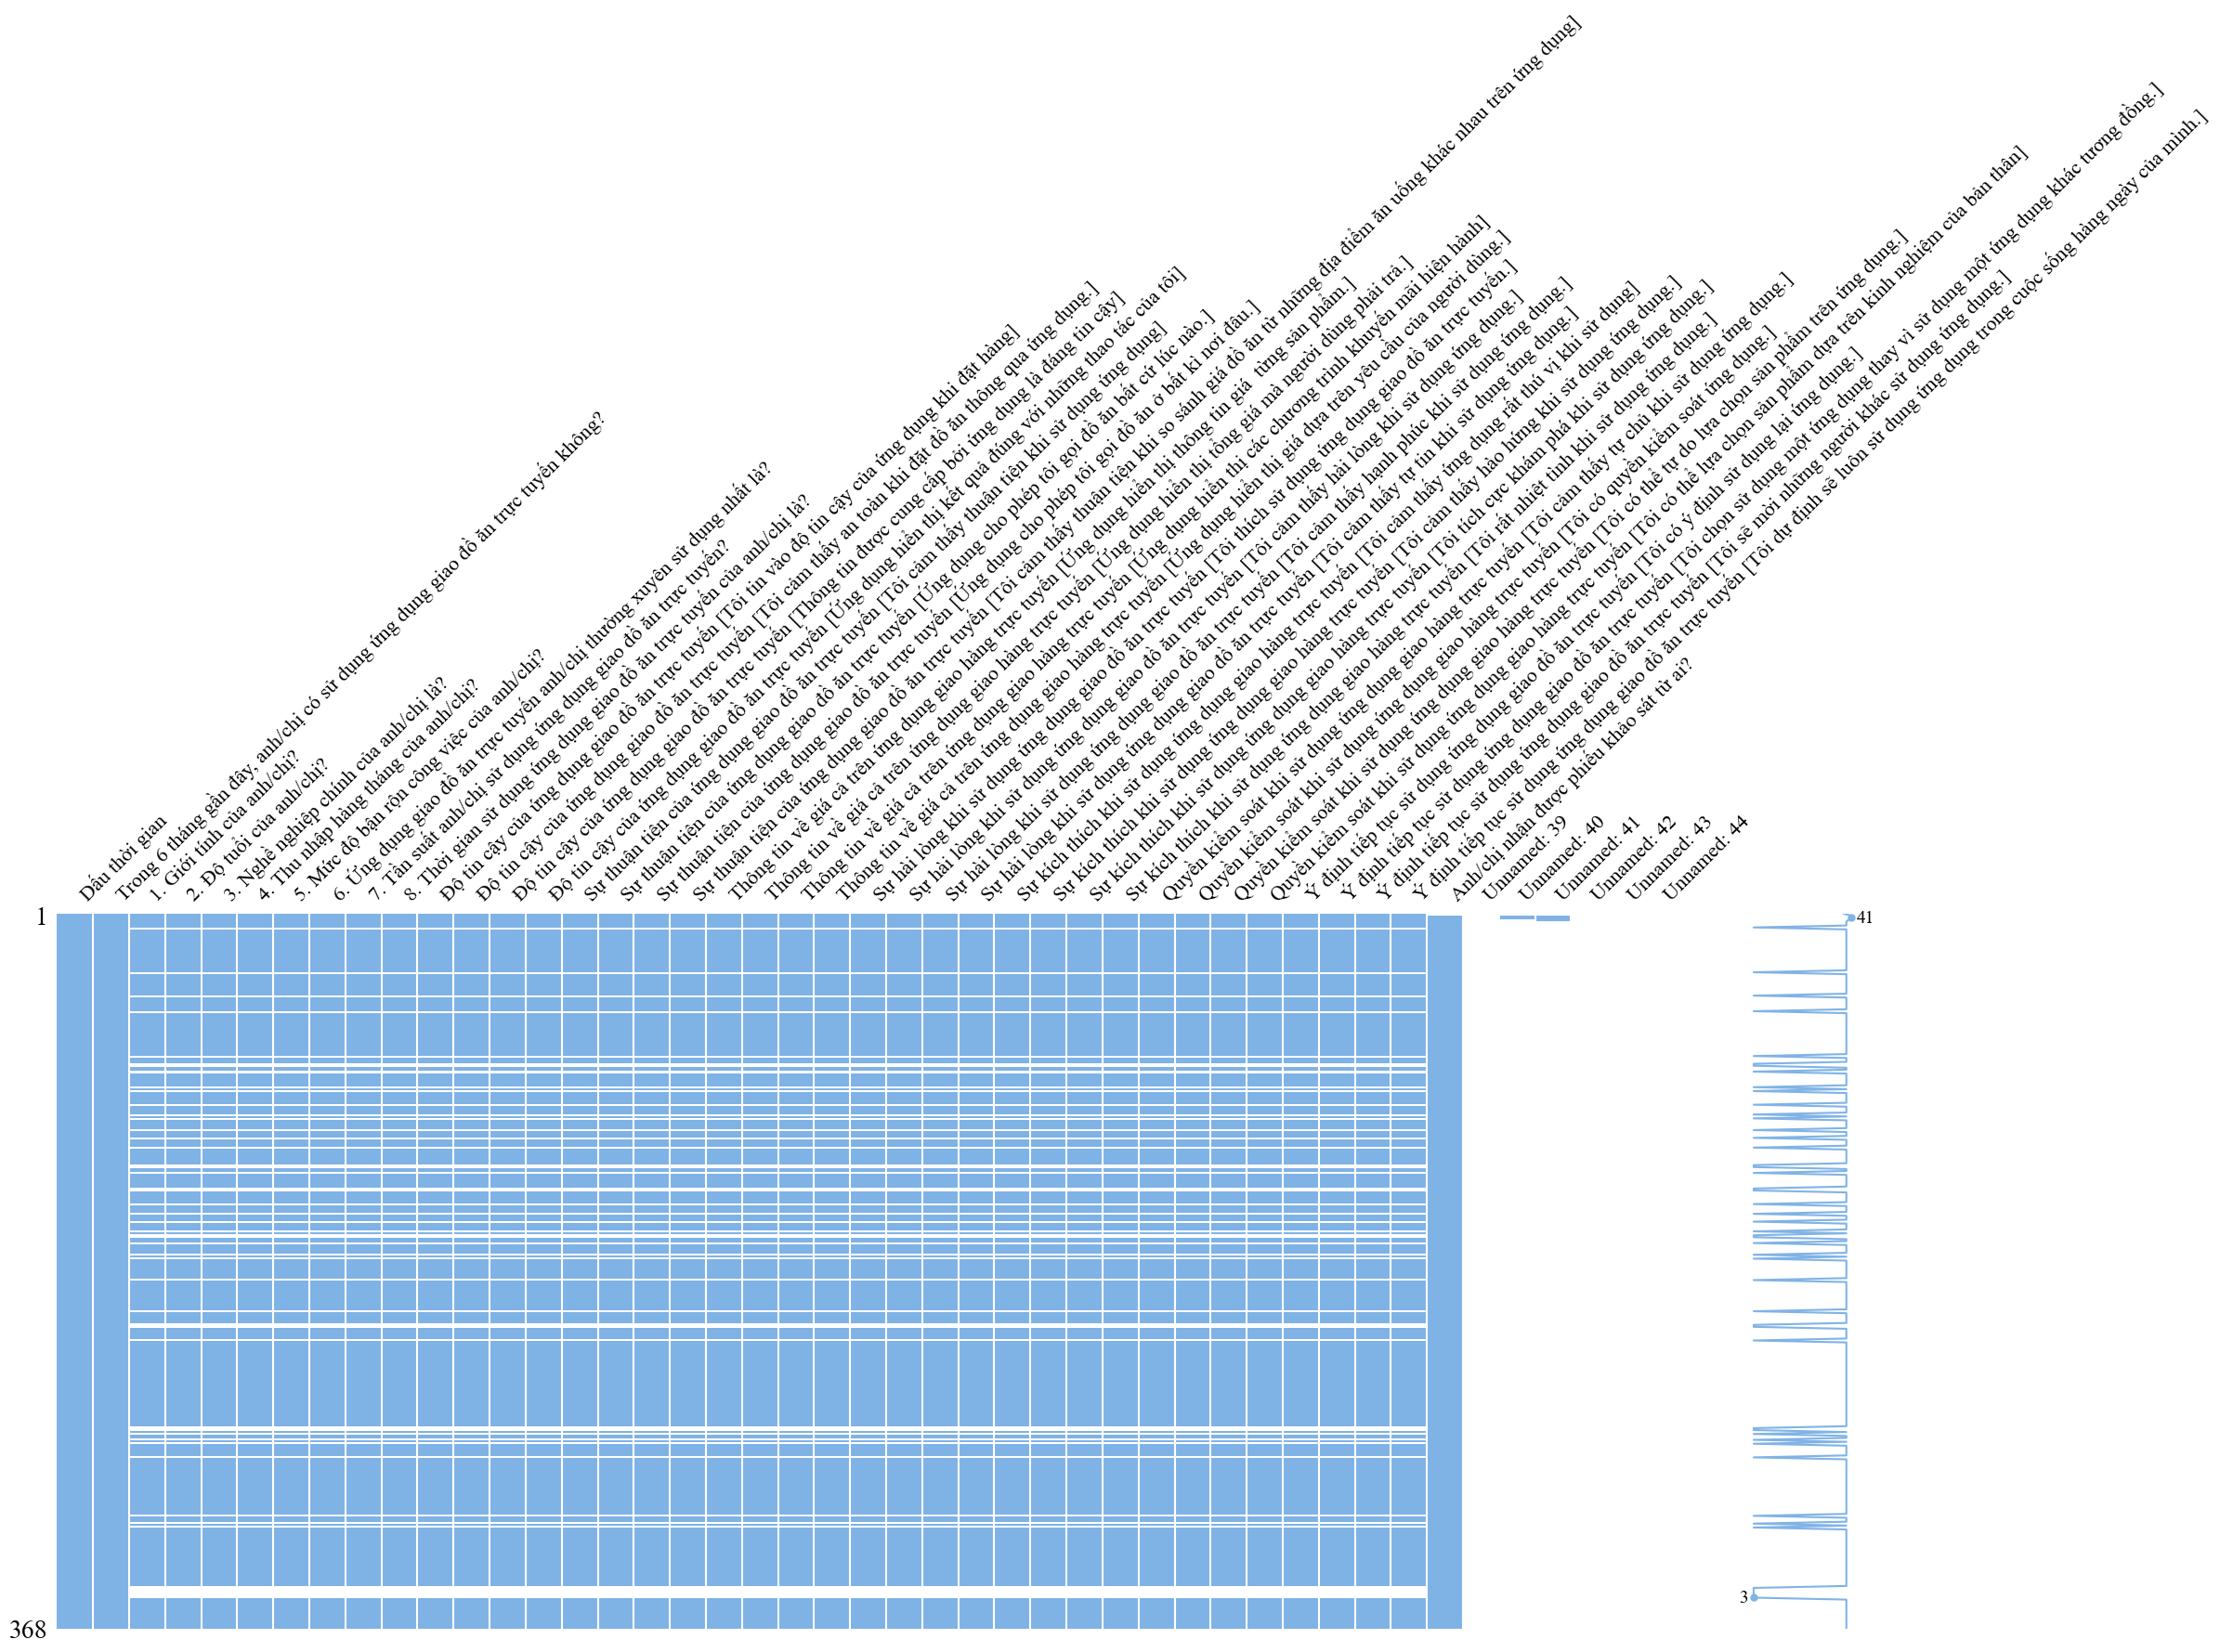

In [ ]:
#tạo  biểu đồ ma trận nơi mà các ô trống (null) được đánh dấu bằng màu khác nhau
msno.matrix(df_PKhaoSat, color =(0.5,0.7,0.9));

In [ ]:
#Kiem tra kieu du lieu cua cac thuoc tinh
df_PKhaoSat.dtypes

Dấu thời gian                                                                                                                                          object
Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                        object
1. Giới tính của anh/chị?                                                                                                                              object
2. Độ tuổi của anh/chị?                                                                                                                                object
3. Nghề nghiệp chính của anh/chị là?                                                                                                                   object
4. Thu nhập hàng tháng của anh/chị?                                                                                                                    object
5. Mức độ bận rộn công việc của anh/chị?            

<h1>XỬ LÝ DỮ LIỆU</h1>

In [ ]:
# 1. Loại bỏ các cột không cần thiết (Unnamed, toàn Null và cột "Nhận khảo sát từ ai")
columns_to_drop = [col for col in df_PKhaoSat.columns if col.startswith("Unnamed") or df_PKhaoSat[col].isnull().all() or col == "Anh/chị nhận được phiếu khảo sát từ ai?"]
df_khaosat_cleaned = df_PKhaoSat.drop(columns=columns_to_drop)
# 2. Xóa các hàng có câu trả lời "Không" trong cột "Anh chị có sử dụng ứng dụng không?"
df_khaosat_cleaned = df_khaosat_cleaned[df_khaosat_cleaned["Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?"] != "Không"]

# 3. Sắp xếp lại chỉ số (index) sau khi xóa
df_khaosat_cleaned = df_khaosat_cleaned.reset_index(drop=True)

# 4. Điền giá trị Null
for col in df_khaosat_cleaned.columns:
    # Nếu cột là dạng số -> Thay bằng giá trị trung bình
    if df_khaosat_cleaned[col].dtype in ['float64', 'int64']:
        df_khaosat_cleaned[col] = df_khaosat_cleaned[col].fillna(df_khaosat_cleaned[col].median())
    # Nếu cột là dạng object (chuỗi/phân loại) -> Thay bằng giá trị xuất hiện phổ biến nhất
    elif df_khaosat_cleaned[col].dtype == 'object':
        df_khaosat_cleaned[col] = df_khaosat_cleaned[col].fillna(df_khaosat_cleaned[col].mode()[0])

# 5. Loại bỏ các ký tự không mong muốn trong cột mức độ bận rộn
df_khaosat_cleaned["5. Mức độ bận rộn công việc của anh/chị?"] = df_khaosat_cleaned["5. Mức độ bận rộn công việc của anh/chị?"].str.replace(r"[^\w\s]", "", regex=True).str.strip()
# 6. Kiểm tra lại số lượng Null còn lại
df_khaosat_cleaned.isnull().sum()

Dấu thời gian                                                                                                                                         0
Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?                                                                       0
1. Giới tính của anh/chị?                                                                                                                             0
2. Độ tuổi của anh/chị?                                                                                                                               0
3. Nghề nghiệp chính của anh/chị là?                                                                                                                  0
4. Thu nhập hàng tháng của anh/chị?                                                                                                                   0
5. Mức độ bận rộn công việc của anh/chị?                                                

In [ ]:
#6. Kiểm tra trùng lặp
df_khaosat_cleaned.duplicated().any()

np.False_

In [ ]:
df_khaosat_cleaned.head(10)

,Dấu thời gian,"Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?",1. Giới tính của anh/chị?,2. Độ tuổi của anh/chị?,3. Nghề nghiệp chính của anh/chị là?,4. Thu nhập hàng tháng của anh/chị?,5. Mức độ bận rộn công việc của anh/chị?,6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?,7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?,8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?,...,Sự kích thích khi sử dụng ứng dụng giao hàng trực tuyến [Tôi tích cực khám phá khi sử dụng ứng dụng.],Sự kích thích khi sử dụng ứng dụng giao hàng trực tuyến [Tôi rất nhiệt tình khi sử dụng ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi cảm thấy tự chủ khi sử dụng ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có quyền kiểm soát ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có thể tự do lựa chọn sản phẩm trên ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có thể lựa chọn sản phẩm dựa trên kinh nghiệm của bản thân],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi có ý định sử dụng lại ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi chọn sử dụng một ứng dụng thay vì sử dụng một ứng dụng khác tương đồng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi sẽ mời những người khác sử dụng ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi dự định sẽ luôn sử dụng ứng dụng trong cuộc sống hàng ngày của mình.]
0,4/12/2024 5:58:21,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Từ 3 đến 5 triệu đồng,Ít bận rộn,beFood (be),Ít hơn 1 lần/tháng,Dưới 1 năm,...,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0
1,4/13/2024 9:51:43,Có,Nam,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,GoFood (Gojek),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,5.0,5.0,4.0,5.0,4.0,3.0,5.0,5.0,2.0,5.0
2,4/13/2024 12:32:17,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Rất ít bận rộn,GoFood (Gojek),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,4.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0
3,4/13/2024 12:46:24,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,GoFood (Gojek),Ít hơn 1 lần/tháng,Từ 1 đến 2 năm,...,3.0,2.0,4.0,4.0,5.0,5.0,4.0,2.0,3.0,3.0
4,4/13/2024 12:48:15,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,ShopeeFood (Shopee),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0
5,4/13/2024 12:49:03,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,GoFood (Gojek),Từ 1 đến 2 lần/tháng,Từ 1 đến 2 năm,...,2.0,2.0,2.0,2.0,4.0,3.0,4.0,2.0,2.0,3.0
6,4/13/2024 12:53:12,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,ShopeeFood (Shopee),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
7,4/13/2024 12:54:42,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,beFood (be),Từ 1 đến 2 lần/tháng,Từ 1 đến 2 năm,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
8,4/13/2024 12:58:30,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bình thường,beFood (be),Từ 1 đến 2 lần/tháng,Dưới 1 năm,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
9,4/13/2024 12:59:48,Có,Nữ,Từ 18 đến 25 tuổi,Sinh viên,Dưới 3 triệu đồng,Bận rộn,beFood (be),Từ 3 đến 4 lần/tháng,Từ 1 đến 2 năm,...,4.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0


In [ ]:
#tóm tắt
df_khaosat_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi tin vào độ tin cậy của ứng dụng khi đặt hàng],318.0,3.943396,0.903867,1.0,3.0,4.0,5.0,5.0
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy an toàn khi đặt đồ ăn thông qua ứng dụng.],318.0,3.845912,0.932162,1.0,3.0,4.0,5.0,5.0
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Thông tin được cung cấp bởi ứng dụng là đáng tin cậy],318.0,3.817610,0.887028,1.0,3.0,4.0,4.0,5.0
Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Ứng dụng hiển thị kết quả đúng với những thao tác của tôi],318.0,4.009434,0.882661,1.0,4.0,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi sử dụng ứng dụng],318.0,4.122642,0.895515,1.0,4.0,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn bất cứ lúc nào.],318.0,4.113208,0.919341,1.0,4.0,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn ở bất kì nơi đâu.],318.0,3.993711,0.982476,1.0,4.0,4.0,5.0,5.0
Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi so sánh giá đồ ăn từ những địa điểm ăn uống khác nhau trên ứng dụng],318.0,4.003145,0.934777,1.0,3.0,4.0,5.0,5.0
Thông tin về giá cả trên ứng dụng giao hàng trực tuyến [Ứng dụng hiển thị thông tin giá từng sản phẩm.],318.0,4.229560,0.859613,1.0,4.0,4.0,5.0,5.0
Thông tin về giá cả trên ứng dụng giao hàng trực tuyến [Ứng dụng hiển thị tổng giá mà người dùng phải trả.],318.0,4.270440,0.875070,1.0,4.0,4.0,5.0,5.0


In [ ]:
from skimpy import skim


In [ ]:
#tổng quan dữ liệu
skim(df_khaosat_cleaned)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 318    │ │ float64     │ 28    │                                                          │
│ │ Number of columns │ 38     │ │ string      │ 10    │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column                    ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0  ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Độ tin cậy của ứng dụng   │   0 │      0 │   3.943 │   0.9039 │   1 │    3 │    4 │    5 │     5 │  ▁ ▃▇▅  │  │
│ │ giao đồ ăn trực tuyến     │     │        │         │          │     │      │      │      │       │         │  │
│ │ [Tôi tin vào độ tin cậy   │     │        │         │          │     │      │      │      │       │         │  │
│ │ của ứng dụng khi đặt      │     │        │         │          │     │      │      │      │       │         │  │
│ │ hàng]                     │     │        │         │          │     │      │      │      │       │         │  │
│ │ Độ tin cậy của ứng dụng   │   0 │      0 │   3.846 │   0.9322 │   1 │    3 │    4 │    5 │     5 │  ▁ ▆▇▆  │  │
│ │ giao đồ ăn trực tuyến     │     │        │         │          │     │      │      │      │       │         │  │
│ │ [Tôi cảm thấy an toàn khi │     │        │         │          │     │      │      │      │       │         │  │
│ │ đặt đồ ăn thông qua ứng   │     │        │         │          │     │      │      │      │       │         │  │
│ │ dụng.]                    │     │        │         │          │     │      │      │      │       │         │  │
│ │ Độ tin cậy của ứng dụng   │   0 │      0 │   3.818 │    0.887 │   1 │    3 │    4 │    4 │     5 │  ▁ ▅▇▅  │  │
│ │ giao đồ ăn trực tuyến     │     │        │         │          │     │      │      │      │       │         │  │
│ │ [Thông tin được cung cấp  │     │        │         │          │     │      │      │      │       │         │  │
│ │ bởi ứng dụng là đáng tin  │     │        │         │          │     │      │      │      │       │         │  │
│ │ cậy]                      │     │        │         │          │     │      │      │      │       │         │  │
│ │ Độ tin cậy của ứng dụng   │   0 │      0 │   4.009 │   0.8827 │   1 │    4 │    4 │    5 │     5 │  ▁ ▃▇▆  │  │
│ │ giao đồ ăn trực tuyến     │     │        │         │          │     │      │      │      │       │         │  │
│ │ [Ứng dụng hiển thị kết    │     │        │         │          │     │      │      │      │       │         │  │
│ │ quả đúng với những thao   │     │        │         │          │     │      │      │      │       │         │  │
│ │ tác của tôi]              │     │        │         │          │     │      │      │      │       │         │  │
│ │ Sự thuận tiện của ứng     │   0 │      0 │   4.123 │   0.8955 │   1 │    4 │    4 │    5 │     5 │    ▃▇▇  │  │
│ │ dụng giao đồ ăn trực      │     │        │         │          │     │      │      │      │       │         │  │
│ │ tuyến [Tôi cảm thấy thuận │     │        │         │

In [ ]:
#tóm tắt
df_khaosat_cleaned.describe()

,Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi tin vào độ tin cậy của ứng dụng khi đặt hàng],Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy an toàn khi đặt đồ ăn thông qua ứng dụng.],Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Thông tin được cung cấp bởi ứng dụng là đáng tin cậy],Độ tin cậy của ứng dụng giao đồ ăn trực tuyến [Ứng dụng hiển thị kết quả đúng với những thao tác của tôi],Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi sử dụng ứng dụng],Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn bất cứ lúc nào.],Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Ứng dụng cho phép tôi gọi đồ ăn ở bất kì nơi đâu.],Sự thuận tiện của ứng dụng giao đồ ăn trực tuyến [Tôi cảm thấy thuận tiện khi so sánh giá đồ ăn từ những địa điểm ăn uống khác nhau trên ứng dụng],Thông tin về giá cả trên ứng dụng giao hàng trực tuyến [Ứng dụng hiển thị thông tin giá từng sản phẩm.],Thông tin về giá cả trên ứng dụng giao hàng trực tuyến [Ứng dụng hiển thị tổng giá mà người dùng phải trả.],...,Sự kích thích khi sử dụng ứng dụng giao hàng trực tuyến [Tôi tích cực khám phá khi sử dụng ứng dụng.],Sự kích thích khi sử dụng ứng dụng giao hàng trực tuyến [Tôi rất nhiệt tình khi sử dụng ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi cảm thấy tự chủ khi sử dụng ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có quyền kiểm soát ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có thể tự do lựa chọn sản phẩm trên ứng dụng.],Quyền kiểm soát khi sử dụng ứng dụng giao hàng trực tuyến [Tôi có thể lựa chọn sản phẩm dựa trên kinh nghiệm của bản thân],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi có ý định sử dụng lại ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi chọn sử dụng một ứng dụng thay vì sử dụng một ứng dụng khác tương đồng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi sẽ mời những người khác sử dụng ứng dụng.],Ý định tiếp tục sử dụng ứng dụng giao đồ ăn trực tuyến [Tôi dự định sẽ luôn sử dụng ứng dụng trong cuộc sống hàng ngày của mình.]
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.00000,...,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.00000,318.000000,318.000000
mean,3.943396,3.845912,3.817610,4.009434,4.122642,4.113208,3.993711,4.003145,4.229560,4.27044,...,3.745283,3.660377,3.937107,3.896226,4.100629,3.993711,4.053459,3.63522,3.685535,3.685535
std,0.903867,0.932162,0.887028,0.882661,0.895515,0.919341,0.982476,0.934777,0.859613,0.87507,...,0.976648,0.981406,0.892913,0.959060,0.910472,0.905621,0.923051,1.13683,1.030380,1.098541
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.00000,...,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.00000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000
75%,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000


In [ ]:
#Tóm tắt dữ liệu kiểu object
df_khaosat_cleaned.describe(include=object).T

,count,unique,top,freq
Dấu thời gian,318,316,4/13/2024 20:38:39,2
"Trong 6 tháng gần đây, anh/chị có sử dụng ứng dụng giao đồ ăn trực tuyến không?",318,1,Có,318
1. Giới tính của anh/chị?,318,2,Nữ,186
2. Độ tuổi của anh/chị?,318,5,Từ 18 đến 25 tuổi,255
3. Nghề nghiệp chính của anh/chị là?,318,7,Sinh viên,226
4. Thu nhập hàng tháng của anh/chị?,318,4,Dưới 3 triệu đồng,169
5. Mức độ bận rộn công việc của anh/chị?,318,5,Bình thường,131
6. Ứng dụng giao đồ ăn trực tuyến anh/chị thường xuyên sử dụng nhất là?,318,6,ShopeeFood (Shopee),114
7. Tần suất anh/chị sử dụng ứng dụng giao đồ ăn trực tuyến?,318,5,Ít hơn 1 lần/tháng,91
8. Thời gian sử dụng ứng dụng giao đồ ăn trực tuyến của anh/chị là?,318,4,Từ 1 đến 2 năm,123


In [ ]:
#Đổi tên thuộc tính
old_columns = df_khaosat_cleaned.columns
#Định nghianghĩa lại tên cột mới
columns_to_rename = {
    old_columns[i]: new_name
    for i, new_name in enumerate([
        "Thời gian",
        "Có sử dụng trong 6 tháng",
        "Giới tính",
        "Tuổi",
        "Nghề nghiệp",
        "Thu nhập hàng tháng",
        "Mức độ bận rộn",
        "Ứng dụng thường dùng",
        "Tần suất sử dụng",
        "Thời gian sử dụng",
        "Tin cậy 1",
        "Tin cậy 2",
        "Tin cậy 3",
        "Tin cậy 4",
        "Thuận tiện 1",
        "Thuận tiện 2",
        "Thuận tiện 3",
        "Thuận tiện 4",
        "Thông tin giá 1",
        "Thông tin giá 2",
        "Thông tin giá 3",
        "Thông tin giá 4",
        "Sự hài lòng 1",
        "Sự hài lòng 2",
        "Sự hài lòng 3",
        "Sự hài lòng 4",
        "Sự kích thích 1",
        "Sự kích thích 2",
        "Sự kích thích 3",
        "Sự kích thích 4",
        "Quyền kiểm soát 1",
        "Quyền kiểm soát 2",
        "Quyền kiểm soát 3",
        "Quyền kiểm soát 4",
        "Ý định dùng tiếp 1",
        "Ý định dùng tiếp 2",
        "Ý định dùng tiếp 3",
        "Ý định dùng tiếp 4",
    ])
}

# Đổi tên cột trong DataFrame
df_khaosat_cleaned = df_khaosat_cleaned.rename(columns=columns_to_rename)

# Kiểm tra kết quả đã đổi tên
df_khaosat_cleaned.head(5).T


,0,1,2,3,4
Thời gian,4/12/2024 5:58:21,4/13/2024 9:51:43,4/13/2024 12:32:17,4/13/2024 12:46:24,4/13/2024 12:48:15
Có sử dụng trong 6 tháng,Có,Có,Có,Có,Có
Giới tính,Nam,Nam,Nữ,Nữ,Nữ
Tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi
Nghề nghiệp,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên
Thu nhập hàng tháng,Từ 3 đến 5 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng
Mức độ bận rộn,Ít bận rộn,Bình thường,Rất ít bận rộn,Bận rộn,Bận rộn
Ứng dụng thường dùng,beFood (be),GoFood (Gojek),GoFood (Gojek),GoFood (Gojek),ShopeeFood (Shopee)
Tần suất sử dụng,Ít hơn 1 lần/tháng,Từ 3 đến 4 lần/tháng,Từ 1 đến 2 lần/tháng,Ít hơn 1 lần/tháng,Từ 1 đến 2 lần/tháng
Thời gian sử dụng,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm


In [ ]:
#Nhóm các cột lại để tính trung bình
reliability_columns = [
        "Tin cậy 1",
        "Tin cậy 2",
        "Tin cậy 3",
        "Tin cậy 4"
]
convenience_columns = [
        "Thuận tiện 1",
        "Thuận tiện 2",
        "Thuận tiện 3",
        "Thuận tiện 4"
]
price_columns = [
        "Thông tin giá 1",
        "Thông tin giá 2",
        "Thông tin giá 3",
        "Thông tin giá 4"
]
satisfaction_columns = [
    "Sự hài lòng 1",
        "Sự hài lòng 2",
        "Sự hài lòng 3",
        "Sự hài lòng 4"
]
stimulation_columns = [
    "Sự kích thích 1",
        "Sự kích thích 2",
        "Sự kích thích 3",
        "Sự kích thích 4"
]
control_columns = [
    "Quyền kiểm soát 1",
        "Quyền kiểm soát 2",
        "Quyền kiểm soát 3",
        "Quyền kiểm soát 4"
]
reuse_intention_columns = [
    "Ý định dùng tiếp 1",
        "Ý định dùng tiếp 2",
        "Ý định dùng tiếp 3",
        "Ý định dùng tiếp 4"
]

# <a name='Customer Satisfaction'></a>

<div style="border-radius:10px;
            background-color:lightseagreen;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
3. EDA - Exploratory Data Analysis</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

<h1> PHÂN TÍCH HÀNH VI KHÁCH HÀNG</h1>

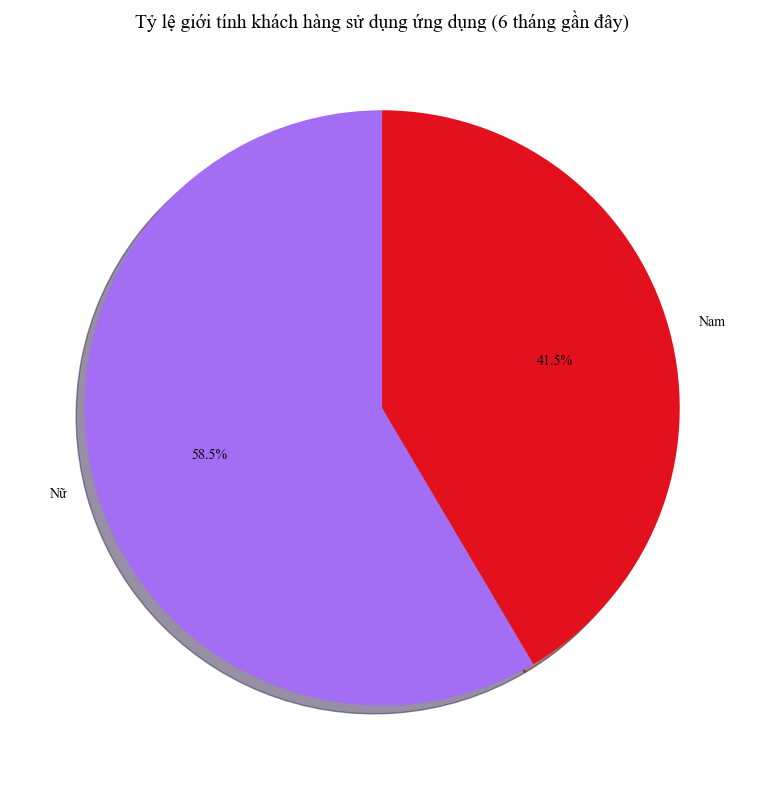

In [ ]:
colors = np.random.rand(10, 3) #Chỉnh màu cho đệp:>
# 1. Tỷ lệ giới tính khách hàng
gender_counts = df_khaosat_cleaned['Giới tính'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, shadow = True,colors= colors)
plt.title('Tỷ lệ giới tính khách hàng sử dụng ứng dụng (6 tháng gần đây)', fontsize=14)

plt.tight_layout()
plt.show()

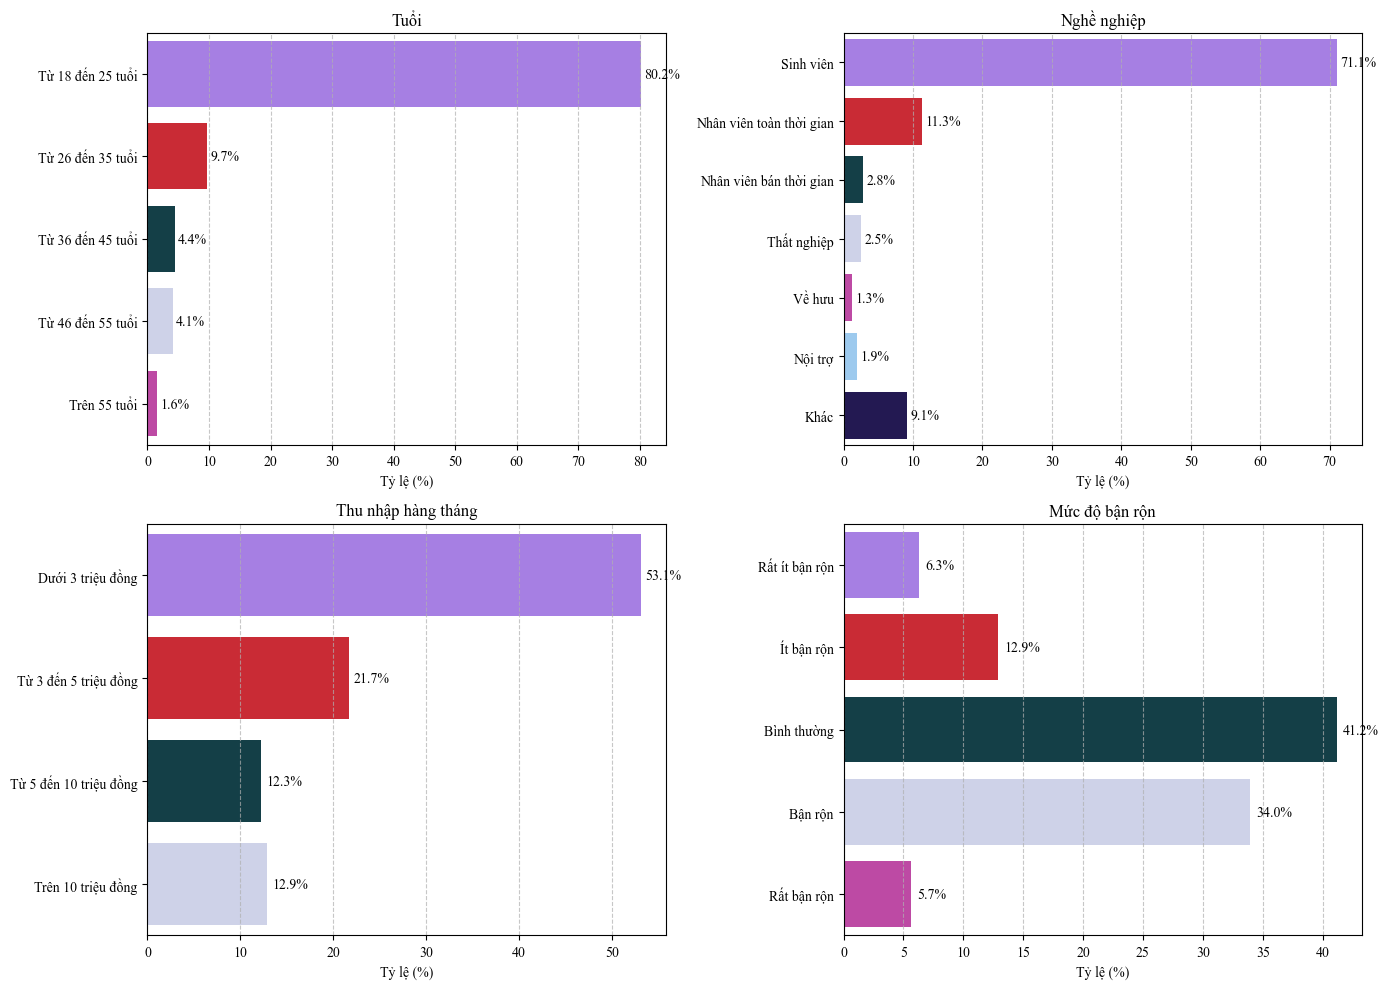

In [ ]:

order_dict = {
    "Tuổi": ["Từ 18 đến 25 tuổi", "Từ 26 đến 35 tuổi", "Từ 36 đến 45 tuổi", "Từ 46 đến 55 tuổi", "Trên 55 tuổi"],
    "Nghề nghiệp": ["Sinh viên", "Nhân viên toàn thời gian", "Nhân viên bán thời gian", "Thất nghiệp", "Về hưu", "Nội trợ", "Khác"],
    "Thu nhập hàng tháng": ["Dưới 3 triệu đồng", "Từ 3 đến 5 triệu đồng", "Từ 5 đến 10 triệu đồng", "Trên 10 triệu đồng"],
    "Mức độ bận rộn": ["Rất ít bận rộn", "Ít bận rộn", "Bình thường", "Bận rộn","Rất bận rộn"]
}

# Tạo các biểu đồ
plt.figure(figsize=(14, 10))
for i, column in enumerate(order_dict, 1): #: duyệt qua các phần tử và gán chỉ số từ ...(1) đến hết
    plt.subplot(2, 2, i)
    # Tính tỷ lệ phần trăm
    counts = df_khaosat_cleaned[column].value_counts(normalize=True) * 100
    percentages = counts.reindex(order_dict[column])  # Sắp xếp theo thứ tự được định nghĩa trong order_dict

    # Vẽ biểu đồ với tỷ lệ phần trăm
    sns.barplot(x=percentages, y=percentages.index, palette=colors)
    for index, value in enumerate(percentages):
        plt.text(value + 0.5, index, f'{value:.1f}%', va='center', ha='left', fontsize=10)
    plt.title(column)
    plt.xlabel("Tỷ lệ (%)")
    plt.ylabel("")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


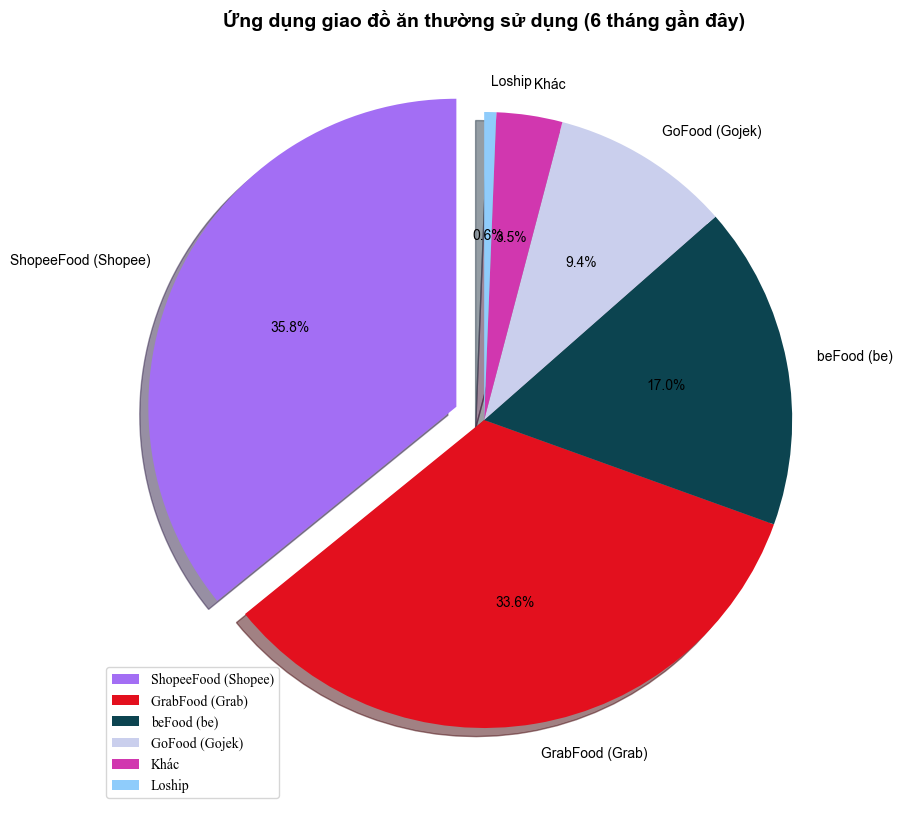

In [ ]:


apps_counts = df_khaosat_cleaned['Ứng dụng thường dùng'].value_counts()
# Vẽ biểu đồ
plt.figure(figsize=(10, 10))
plt.pie(apps_counts,
        labels=apps_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode = [0.1, 0, 0, 0, 0, 0],
        shadow=True,
        textprops={'fontsize': 10, 'fontname': 'Arial'})
plt.title('Ứng dụng giao đồ ăn thường sử dụng (6 tháng gần đây)', fontsize=14, fontweight='bold', fontname='Arial')
plt.legend()
plt.show()


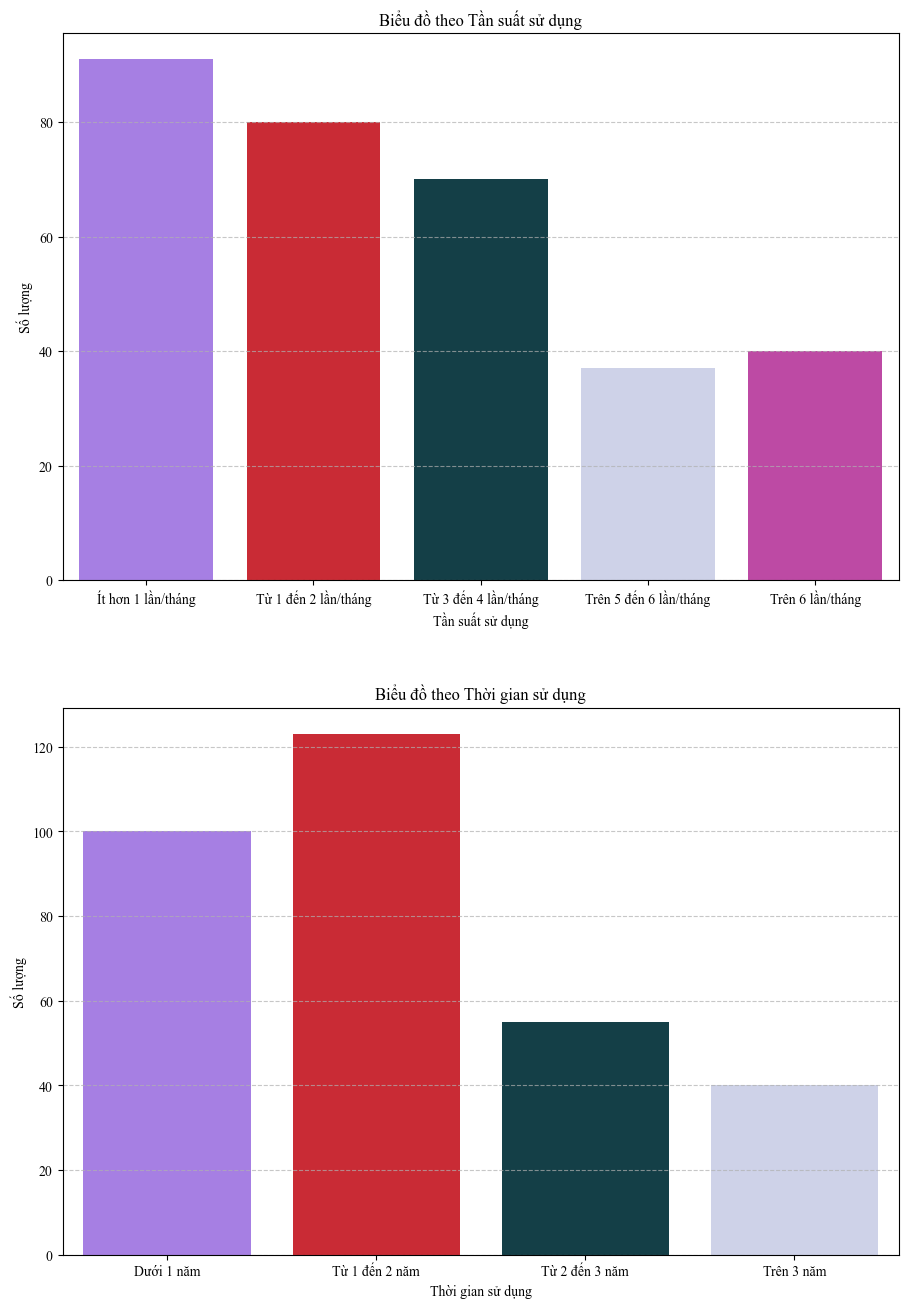

In [ ]:
order_dict = { #order dict laf order dictionary: tu dien sap xep
    "Tần suất sử dụng": ["Ít hơn 1 lần/tháng","Từ 1 đến 2 lần/tháng","Từ 3 đến 4 lần/tháng", "Trên 5 đến 6 lần/tháng", "Trên 6 lần/tháng"],
    "Thời gian sử dụng": ["Dưới 1 năm","Từ 1 đến 2 năm","Từ 2 đến 3 năm" ,"Trên 3 năm"]
}

# Tạo các biểu đồ Histogram
plt.figure(figsize=(10, 14))

# Lặp qua từng cột trong order_dict để tạo histogram
for i, column in enumerate(order_dict, 1):
    plt.subplot(2, 1, i)
    sns.countplot(data=df_khaosat_cleaned, x=column, palette=colors, order=order_dict[column])
    plt.title(f"Biểu đồ theo {column}")
    plt.xlabel(column)
    plt.ylabel("Số lượng")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(pad=4.0)
plt.show()


Thống kê mô tả các nhân tố tác động đén sự hài lòng

In [ ]:

# Tính trung bình theo cột
reliability_mean = df_khaosat_cleaned[reliability_columns].mean(axis=0)
convenience_mean = df_khaosat_cleaned[convenience_columns].mean(axis=0)
price_mean = df_khaosat_cleaned[price_columns].mean(axis=0)
stimulation_mean = df_khaosat_cleaned[stimulation_columns].mean(axis=0)
control_mean = df_khaosat_cleaned[control_columns].mean(axis=0)

# In kết quả trung bình
print(reliability_mean)
print(convenience_mean)
print(price_mean)
print(stimulation_mean)
print(control_mean)

Tin cậy 1    3.943396
Tin cậy 2    3.845912
Tin cậy 3    3.817610
Tin cậy 4    4.009434
dtype: float64
Thuận tiện 1    4.122642
Thuận tiện 2    4.113208
Thuận tiện 3    3.993711
Thuận tiện 4    4.003145
dtype: float64
Thông tin giá 1    4.229560
Thông tin giá 2    4.270440
Thông tin giá 3    4.138365
Thông tin giá 4    3.965409
dtype: float64
Sự kích thích 1    3.792453
Sự kích thích 2    3.685535
Sự kích thích 3    3.745283
Sự kích thích 4    3.660377
dtype: float64
Quyền kiểm soát 1    3.937107
Quyền kiểm soát 2    3.896226
Quyền kiểm soát 3    4.100629
Quyền kiểm soát 4    3.993711
dtype: float64


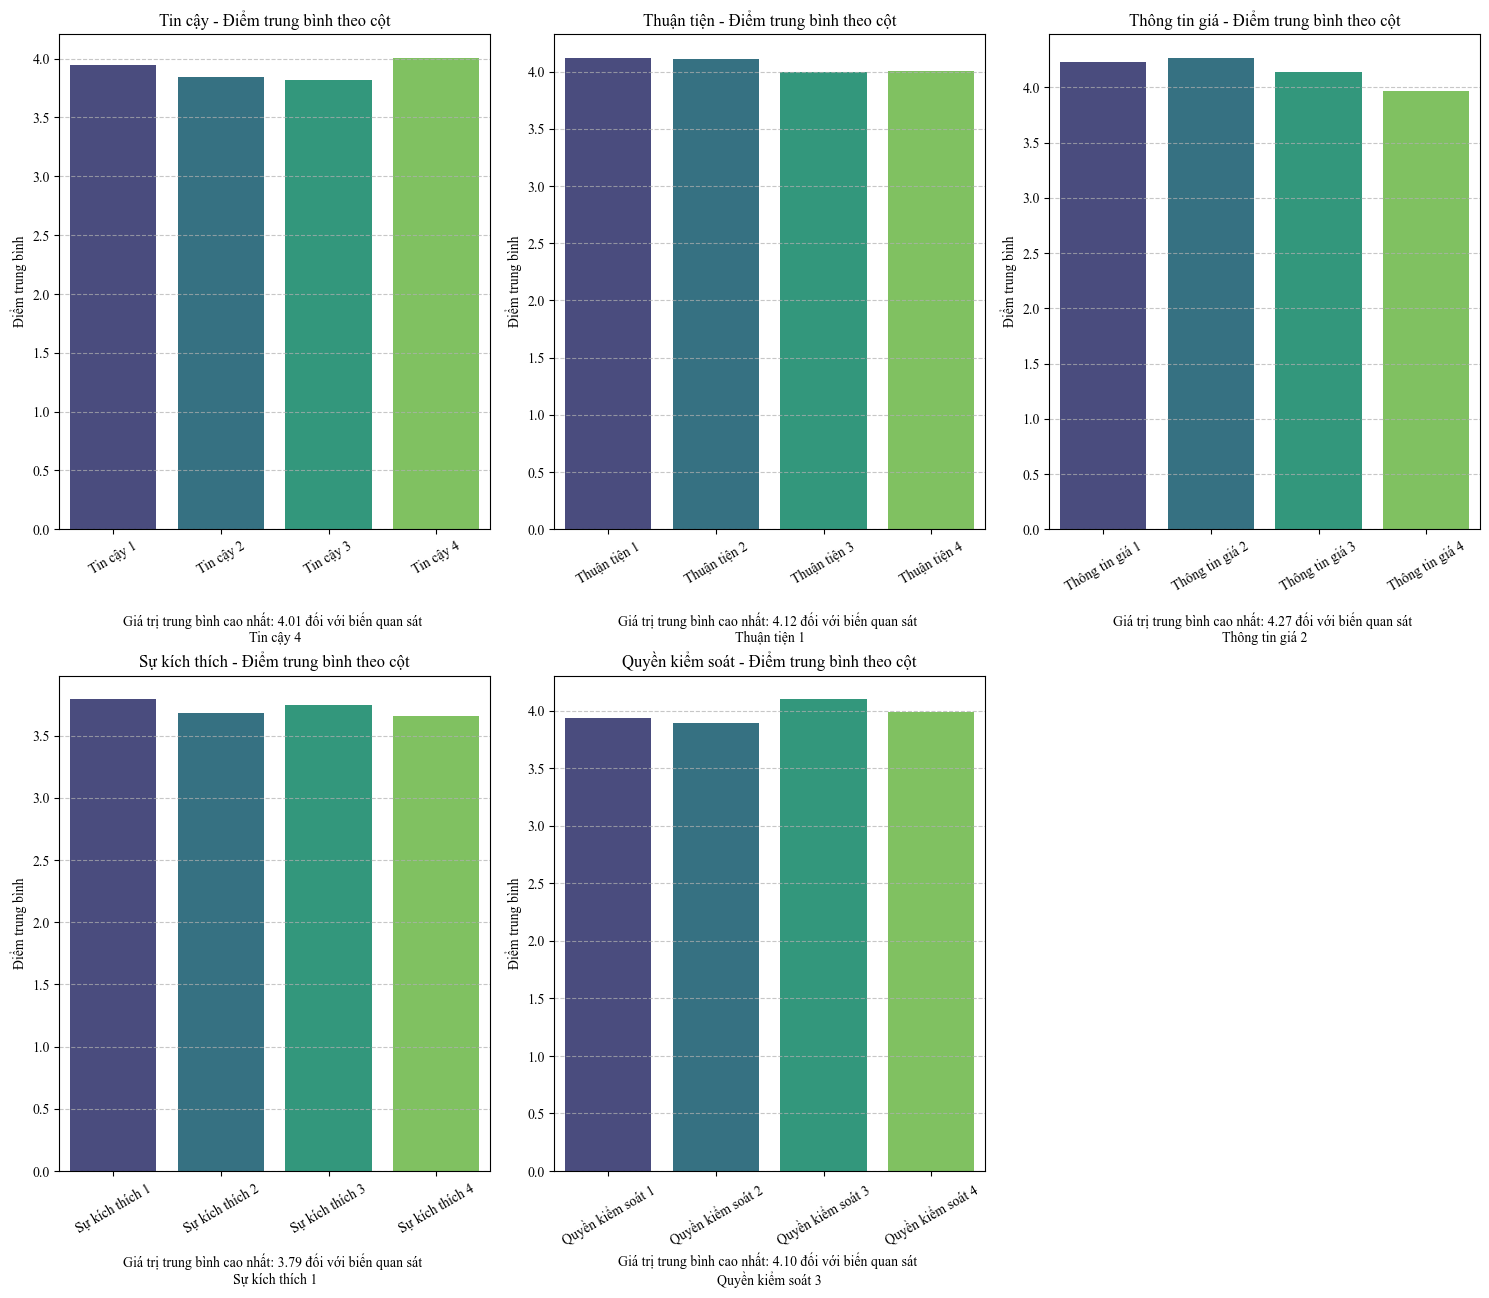

In [ ]:
# Tạo danh sách các trung bình và tên tiêu chí
means = {
    "Tin cậy": reliability_mean,
    "Thuận tiện": convenience_mean,
    "Thông tin giá": price_mean,
    "Sự kích thích": stimulation_mean,
    "Quyền kiểm soát": control_mean
}

# Vẽ 5 biểu đồ cột
plt.figure(figsize=(15, 13))

for i, (criteria, mean_values) in enumerate(means.items(), 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=mean_values.index, y=mean_values.values, palette='viridis')
    plt.title(f'{criteria} - Điểm trung bình theo cột')
    plt.xlabel('')
    plt.ylabel('Điểm trung bình')
    plt.xticks(rotation=30)  # Xoay nhãn trục x cho dễ nhìn
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Lưới dọc

    # Tìm giá trị trung bình cao nhất và cột tương ứng
    max_value = mean_values.max()  # Tìm giá trị trung bình cao nhất
    max_column = mean_values.idxmax()  # Tìm tên cột có giá trị trung bình cao nhất

    # Thêm thông báo dưới biểu đồ cột
    plt.text(0.5, -0.2, f'Giá trị trung bình cao nhất: {max_value:.2f} đối với biến quan sát \n{max_column}',
             ha='center', va='center', fontsize=10, color='black', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


<h2>TÍNH TRUNG BÌNH GOM NHÓM YẾU TỐ</h2>

In [ ]:
# Định nghĩa các nhóm cột và tên cột đầu ra
columns_groups = {
    "Độ tin cậy (Trung bình)": reliability_columns,
    "Sự thuận tiện (Trung bình)": convenience_columns,
    "Thông tin giá (Trung bình)": price_columns,
    "Sự hài lòng (Trung bình)": satisfaction_columns,
    "Sự kích thích (Trung bình)": stimulation_columns,
    "Quyền kiểm soát (Trung bình)": control_columns,
    "Ý định dùng tiếp (Trung bình)": reuse_intention_columns
}

In [ ]:

# average_data = pd.DataFrame() #Tạo dataframe trống để lưu giá trị trung bình
# average_data["Độ tin cậy (Trung bình)"] = df_khaosat_cleaned[reliability_columns].mean(axis=1)
# average_data["Sự thuận tiện (Trung bình)"] = df_khaosat_cleaned[convenience_columns].mean(axis=1)
# average_data["Thông tin giá (Trung bình)"] = df_khaosat_cleaned[price_columns].mean(axis=1)
# average_data["Sự hài lòng (Trung bình)"] = df_khaosat_cleaned[satisfaction_columns].mean(axis=1)
# average_data["Sự kích thích (Trung bình)"] = df_khaosat_cleaned[stimulation_columns].mean(axis=1)
# average_data["Quyền kiểm soát (Trung bình)"] = df_khaosat_cleaned[control_columns].mean(axis=1)
# average_data["Ý định dùng tiếp (Trung bình)"] = df_khaosat_cleaned[reuse_intention_columns].mean(axis=1)
#Có thể được viết gọn thành bên dưới để có thể dễ dàng mở rộng nếu như có thêm các cột mới vẫn sử dụng được chỉ cần ttên cột vào columns_groups

#Tính trung binh theo hàng ngang

average_data = pd.DataFrame({
    name: df_khaosat_cleaned[cols].mean(axis=1)
    for name, cols in columns_groups.items()
})

skim(average_data)
average_data




╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 318    │ │ float64     │ 7     │                                                          │
│ │ Number of columns │ 7      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column                   ┃ NA  ┃ NA %  ┃ mean    ┃ sd       ┃ p0  ┃ p25   ┃ p50    ┃ p75   ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Độ tin cậy (Trung bình)  │   0 │     0 │   3.904 │   0.7969 │   1 │   3.5 │      4 │   4.5 │    5 │   ▁▅▇▅ │  │
│ │ Sự thuận tiện (Trung     │   0 │     0 │   4.058 │   0.8234 │   1 │  3.75 │      4 │  4.75 │    5 │    ▃▇▇ │  │
│ │ bình)                    │     │       │         │          │     │       │        │       │      │        │  │
│ │ Thông tin giá (Trung     │   0 │     0 │   4.151 │   0.7985 │   1 │     4 │  4.125 │  4.75 │    5 │    ▂▇▇ │  │
│ │ bình)                    │     │       │         │          │     │       │        │       │      │        │  │
│ │ Sự hài lòng (Trung bình) │   0 │     0 │    3.85 │   0.8098 │   1 │  3.25 │      4 │   4.5 │    5 │  ▁▁▇▇▆ │  │
│ │ Sự kích thích (Trung     │   0 │     0 │   3.721 │   0.8892 │   1 │     3 │   3.75 │  4.25 │    5 │  ▁▁▇▇▆ │  │
│ │ bình)                    │     │       │         │          │     │       │        │       │      │        │  │
│ │ Quyền kiểm soát (Trung   │   0 │     0 │   3.982 │    0.822 │   1 │   3.5 │      4 │   4.5 │    5 │    ▃▇▇ │  │
│ │ bình)                    │     │       │         │          │     │       │        │       │      │        │  │
│ │ Ý định dùng tiếp (Trung  │   0 │     0 │   3.765 │   0.8889 │   1 │     3 │      4 │  4.25 │    5 │ ▁▁▂▆▇▅ │  │
│ │ bình)                    │     │       │         │          │     │       │        │       │      │        │  │
│ └──────────────────────────┴─────┴───────┴─────────┴──────────┴─────┴───────┴────────┴───────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

,Độ tin cậy (Trung bình),Sự thuận tiện (Trung bình),Thông tin giá (Trung bình),Sự hài lòng (Trung bình),Sự kích thích (Trung bình),Quyền kiểm soát (Trung bình),Ý định dùng tiếp (Trung bình)
0,3.50,4.00,3.50,4.00,2.00,3.00,2.75
1,4.50,4.25,4.50,4.50,4.50,4.00,4.25
2,3.25,3.50,3.25,3.50,3.50,3.25,3.25
3,5.00,5.00,5.00,3.25,2.75,4.50,3.00
4,3.00,3.25,3.75,3.75,3.75,3.75,3.50
...,...,...,...,...,...,...,...
313,3.50,3.00,4.25,3.25,3.50,3.50,3.00
314,4.25,3.75,4.50,4.00,4.25,4.25,3.50
315,3.75,3.50,4.00,3.25,3.00,3.25,2.75
316,4.00,2.50,4.00,3.50,3.75,3.50,3.25


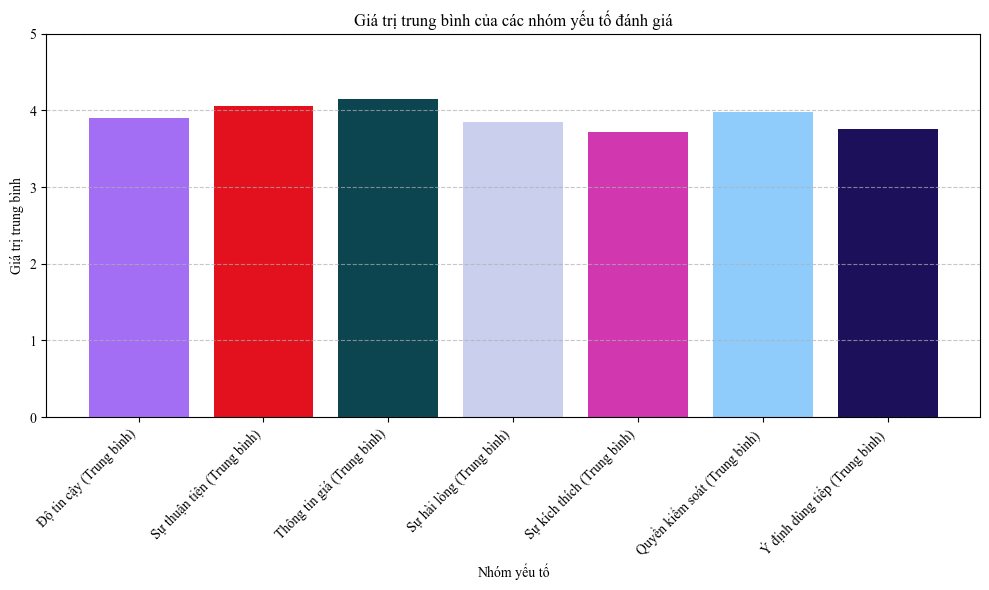

In [ ]:
# Tính giá trị trung bình của từng nhóm (trung bình của toàn bộ DataFrame)
average_scores = average_data.mean()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(average_scores.index, average_scores.values, color=colors)
plt.title('Giá trị trung bình của các nhóm yếu tố đánh giá')
plt.ylabel('Giá trị trung bình')
plt.xlabel('Nhóm yếu tố')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)  # Giới hạn thang điểm từ 0 đến 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h2> PHÂN TÍCH SO SÁNH</h2>

<h3>1. Phân tích tương quan</h3>

,Độ tin cậy (Trung bình),Sự thuận tiện (Trung bình),Thông tin giá (Trung bình),Sự hài lòng (Trung bình),Sự kích thích (Trung bình),Quyền kiểm soát (Trung bình),Ý định dùng tiếp (Trung bình)
Độ tin cậy (Trung bình),1.000000,0.772304,0.767331,0.827517,0.771438,0.777741,0.764052
Sự thuận tiện (Trung bình),0.772304,1.000000,0.790835,0.747901,0.662030,0.823568,0.720707
Thông tin giá (Trung bình),0.767331,0.790835,1.000000,0.739155,0.677587,0.843686,0.690934
Sự hài lòng (Trung bình),0.827517,0.747901,0.739155,1.000000,0.852781,0.792312,0.853256
Sự kích thích (Trung bình),0.771438,0.662030,0.677587,0.852781,1.000000,0.757459,0.835115
Quyền kiểm soát (Trung bình),0.777741,0.823568,0.843686,0.792312,0.757459,1.000000,0.791736
Ý định dùng tiếp (Trung bình),0.764052,0.720707,0.690934,0.853256,0.835115,0.791736,1.000000


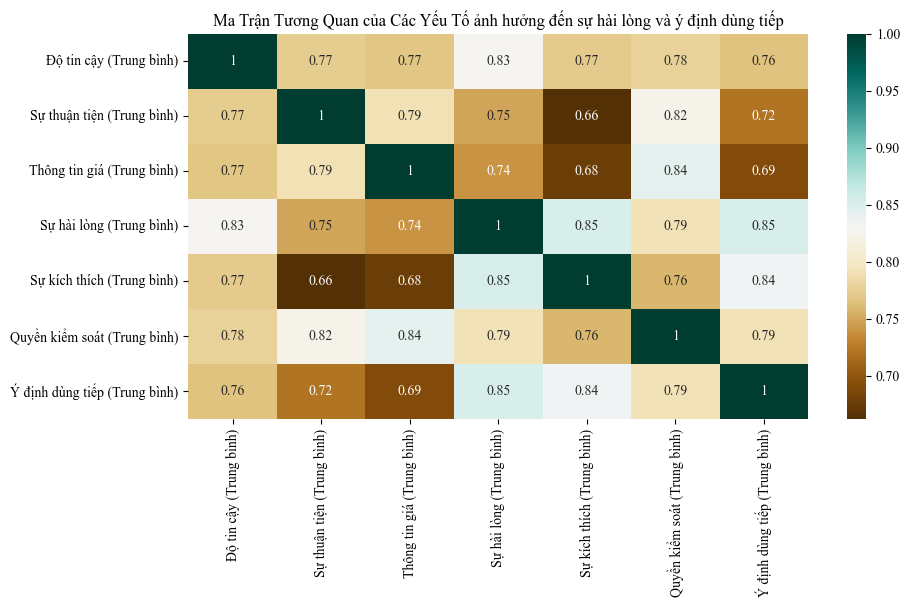

In [ ]:
plt.figure(figsize=(10,5))
c= average_data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.title('Ma Trận Tương Quan của Các Yếu Tố ảnh hưởng đến sự hài lòng và ý định dùng tiếp')
c

<h3> 2. Xác định các mối quan hệ quan trọng (∣r∣>0.8) </h3>

In [ ]:
# Tạo danh sách các mối quan hệ quan trọng
important_relationships = []

# Duyệt qua ma trận tương quan để tìm |r| > 0.8 (ngoại trừ đường chéo chính)
for i in c.index:
    for j in c.columns:
        if i != j and abs(c.loc[i, j]) > 0.8:
            important_relationships.append((i, j, c.loc[i, j]))

# Hiển thị các mối quan hệ quan trọng
print("Các mối quan hệ quan trọng (|r| > 0.8):")
for relationship in important_relationships:
    print(f"{relationship[0]} và {relationship[1]}: r = {relationship[2]:.2f}")


Các mối quan hệ quan trọng (|r| > 0.8):
Độ tin cậy (Trung bình) và Sự hài lòng (Trung bình): r = 0.83
Sự thuận tiện (Trung bình) và Quyền kiểm soát (Trung bình): r = 0.82
Thông tin giá (Trung bình) và Quyền kiểm soát (Trung bình): r = 0.84
Sự hài lòng (Trung bình) và Độ tin cậy (Trung bình): r = 0.83
Sự hài lòng (Trung bình) và Sự kích thích (Trung bình): r = 0.85
Sự hài lòng (Trung bình) và Ý định dùng tiếp (Trung bình): r = 0.85
Sự kích thích (Trung bình) và Sự hài lòng (Trung bình): r = 0.85
Sự kích thích (Trung bình) và Ý định dùng tiếp (Trung bình): r = 0.84
Quyền kiểm soát (Trung bình) và Sự thuận tiện (Trung bình): r = 0.82
Quyền kiểm soát (Trung bình) và Thông tin giá (Trung bình): r = 0.84
Ý định dùng tiếp (Trung bình) và Sự hài lòng (Trung bình): r = 0.85
Ý định dùng tiếp (Trung bình) và Sự kích thích (Trung bình): r = 0.84


<h3>3. So sánh với biến mục tiêu (target: sự hài lòng)</h3>

In [ ]:
 target_variable = "Sự hài lòng (Trung bình)"

# Lọc các yếu tố có tương quan cao với biến mục tiêu
target_relationships = c[target_variable][c[target_variable].abs() > 0.8].drop(target_variable) #drop... loại bỏ giá trị tương quan giữa biến mục tiêu và chính nó

print(f"\nYếu tố có tương quan cao với biến mục tiêu '{target_variable}' (|r| > 0.8):")
for factor, r_value in target_relationships.items():
    print(f"{factor}: r = {r_value:.2f}")
print("Từ đó xác định đây là 3 yếu tố có thể dùng để dự đoán sự hài lòng của khách hàng.")



Yếu tố có tương quan cao với biến mục tiêu 'Sự hài lòng (Trung bình)' (|r| > 0.8):
Độ tin cậy (Trung bình): r = 0.83
Sự kích thích (Trung bình): r = 0.85
Ý định dùng tiếp (Trung bình): r = 0.85
Từ đó xác định đây là 3 yếu tố có thể dùng để dự đoán sự hài lòng của khách hàng.


<h3>4. Phân tích sự hài lòng - không hài lòng</h3>

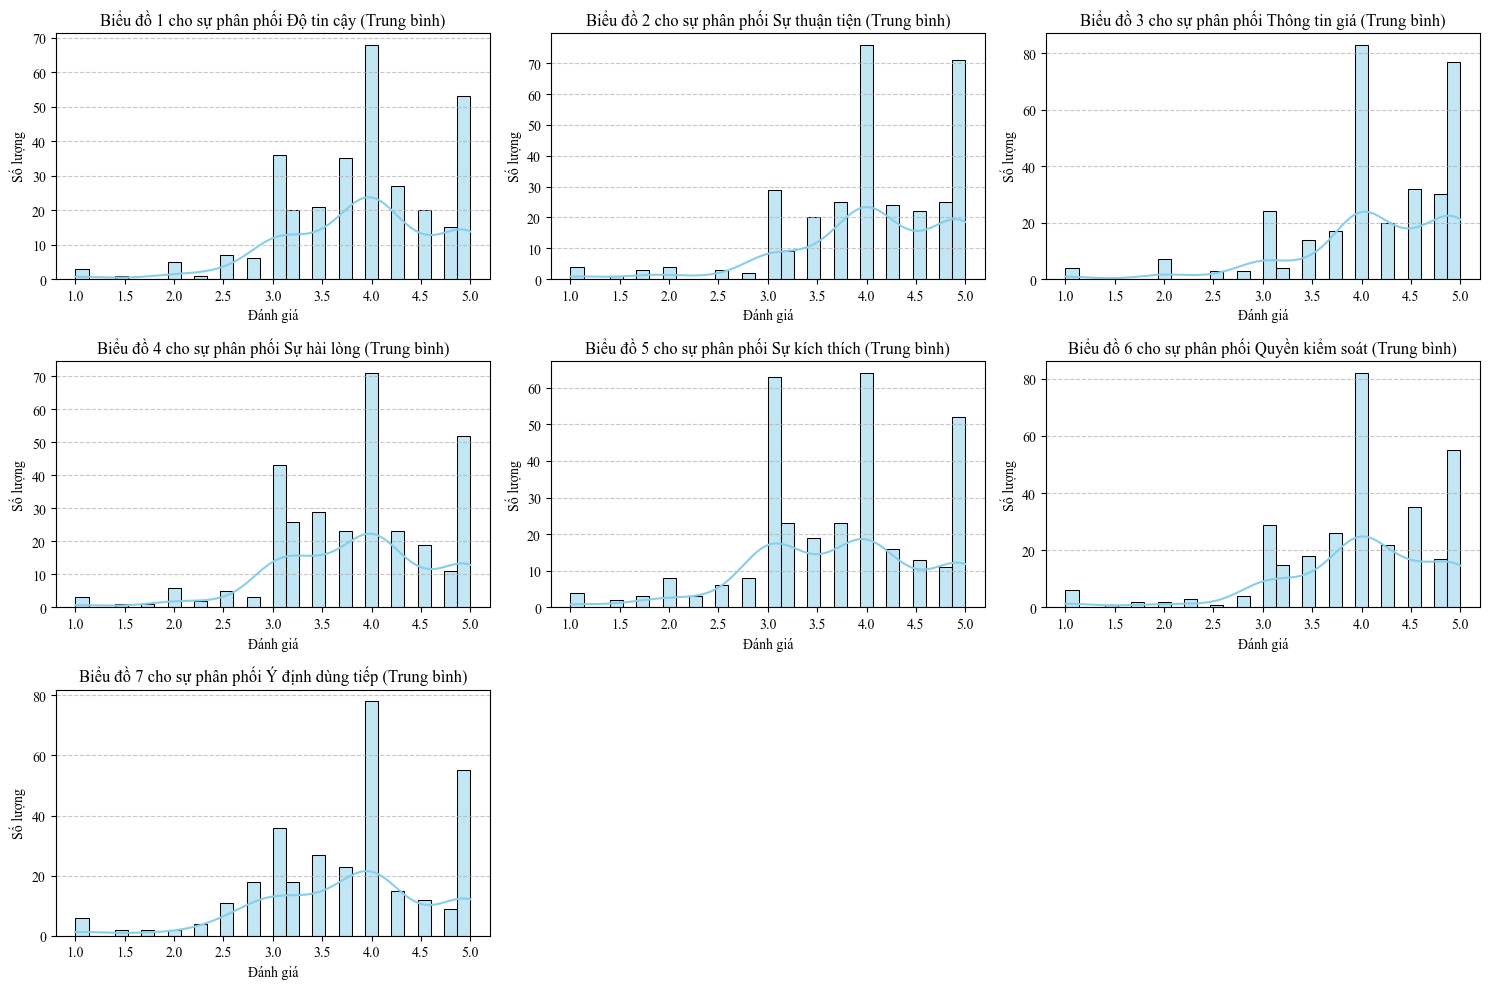

In [ ]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(average_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(average_data[col], bins=30, kde=True, color="skyblue")
    plt.xlabel('Đánh giá')
    plt.ylabel('Số lượng')
    plt.title(f'Biểu đồ {i} cho sự phân phối {col}')
    plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

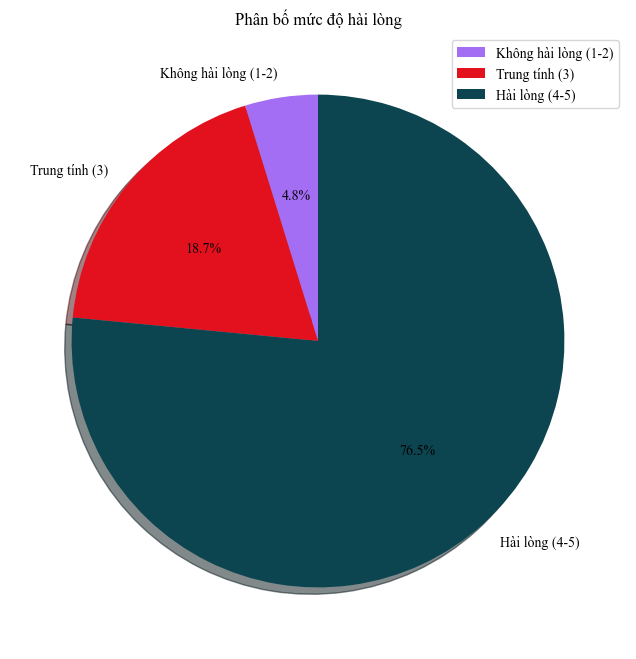

In [ ]:
#Nhóm và định nghĩa lại các phân đoạn của sự hài lòng
groups = {
    "Không hài lòng (1-2)": average_data["Sự hài lòng (Trung bình)"].between(1, 2).sum(),
    "Trung tính (3)": average_data["Sự hài lòng (Trung bình)"].eq(3).sum(),
    "Hài lòng (4-5)": average_data["Sự hài lòng (Trung bình)"].between(4, 5).sum()
}

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(list(groups.values()),
        labels=list(groups.keys()),
        autopct="%1.1f%%",
        startangle=90,
        colors=colors,
        shadow = True)
plt.title("Phân bố mức độ hài lòng")
plt.legend()
plt.show()


<h3>5. Ứng dụng có độ hài lòng cao nhất</h3>

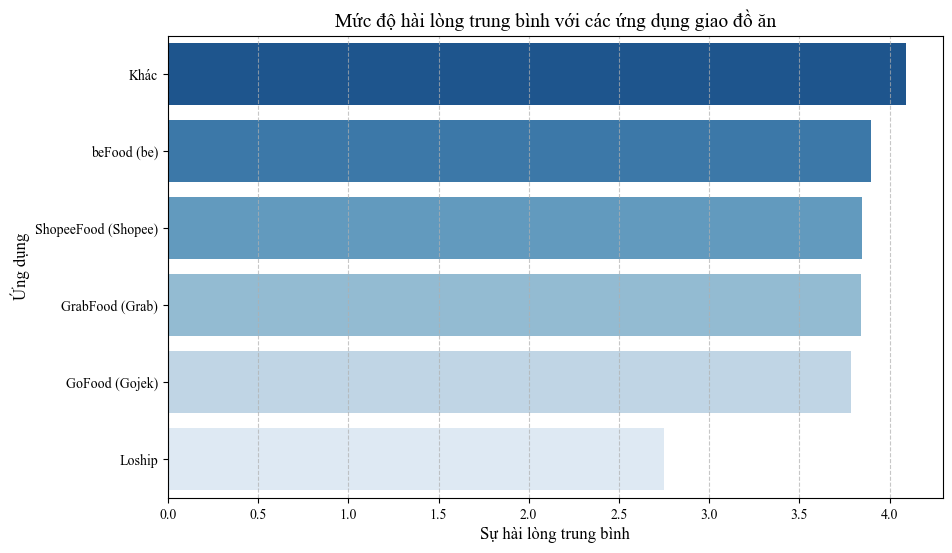

Ứng dụng có độ hài lòng cao nhất là: Khác với điểm hài lòng trung bình: 4.0909


In [ ]:
# Tính toán mức độ hài lòng trung bình theo ứng dụng
satisfaction_mean = (
    df_khaosat_cleaned.groupby("Ứng dụng thường dùng")[satisfaction_columns]
    .mean()
    .mean(axis=1)
    .sort_values(ascending=False)
)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaction_mean, y=satisfaction_mean.index, palette="Blues_r")
plt.title("Mức độ hài lòng trung bình với các ứng dụng giao đồ ăn", fontsize=14)
plt.xlabel("Sự hài lòng trung bình", fontsize=12)
plt.ylabel("Ứng dụng", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Tìm ứng dụng có mức độ hài lòng cao nhất
most_satisfied_app = satisfaction_mean.idxmax()
max_satisfaction_score = satisfaction_mean.max()

# In kết quả
print(f"Ứng dụng có độ hài lòng cao nhất là: {most_satisfied_app} với điểm hài lòng trung bình: {max_satisfaction_score:.4f}")


# <a name='Customer Satisfaction'></a>

<div style="border-radius:10px;
            background-color:lightseagreen;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
4. K-Mean Clustering</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

Hàm chuyển đổi dữ liệu object thành số

In [ ]:
#Hàm lấy random trong khoảng chỉ định Từ ... đến ...

def extract_range(value):
    # Tìm khoảng giá trị trong chuỗi bằng regex cho các trường hợp "Từ ... đến ..." hoặc "Dưới" / "Trên"
    if 'Từ' in value and 'đến' in value:
        match = re.search(r'Từ\s*(\d+)\s*đến\s*(\d+)', value)
        if match:
            lower = int(match.group(1))
            upper = int(match.group(2))
            return round(np.random.uniform(lower, upper), 3)

    elif 'Trên' in value:
        match = re.search(r'Trên\s*(\d+)', value)
        if match:
            lower = int(match.group(1))
            return round(np.random.uniform(lower, 100), 3)

    elif 'Dưới' in value:
        match = re.search(r'Dưới\s*(\d+)', value)
        if match:
            upper = int(match.group(1))
            return round(np.random.uniform(0, upper), 3)

    return value

#Hàm chuyển giá trị thành số để ĐỊNH DANH cho giá trị trong cột
#Hàm để mã hóa một cột trong DataFrame bằng Label Encoding theo thứ tự tự chỉ định (nếu có).
def label_encode(data, column_name, custom_order=None):
    # Nếu có thứ tự tùy chỉnh (custom_order) được cung cấp
    if custom_order is not None:
        data[f'{column_name} mã hóa'] = data[column_name].map(custom_order)
    else:
        # Nếu không có thứ tự tùy chỉnh, sử dụng LabelEncoder
        le = LabelEncoder()
        data[f'{column_name} mã hóa'] = le.fit_transform(data[column_name])+1  # Mã hóa theo cách tự động theo số định danh bắt đầu bằng số 1

    return data


In [ ]:
# Áp dụng hàm vào DataFrame và xử lý các giá trị không hợp lệ
df_copy = df_khaosat_cleaned.copy() #Tạo df_copy sao chép từ dữ liệu ban đầu và thựthực hiện chuyển mã hóa cách giá trị object thành số trong
#df này để tránh ảnh hưởng đến dữ liệu thật
df_copy[f'{'Tuổi'} mã hóa'] = df_copy['Tuổi'].apply(lambda x:int(extract_range(x)))

df_copy = label_encode(df_copy, 'Nghề nghiệp', None)

df_copy[f'{'Thu nhập hàng tháng'} mã hóa'] = df_copy['Thu nhập hàng tháng'].apply(extract_range)

#Chuyển đổi cột Mức độ bận rộn thành số theo thứ tự
order_busy = {
    "Rất ít bận rộn": 1,
    "Ít bận rộn":2,
    "Bình thường":3,
    "Bận rộn":4,
    "Rất bận rộn":5
}
df_copy = label_encode(df_copy, 'Mức độ bận rộn', order_busy)

df_copy = label_encode(df_copy, 'Ứng dụng thường dùng', None)

df_copy[f'{'Thời gian sử dụng'} mã hóa'] = df_copy['Thời gian sử dụng'].apply(lambda x:int(extract_range(x)))

# Kiểm tra kết quả
df_first_last_columns = df_copy[df_copy.columns[3:8].tolist() + [df_copy.columns[9]] + df_copy.columns[-6:].tolist()]
df_first_last_columns.head().T

,0,1,2,3,4
Tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi
Nghề nghiệp,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên
Thu nhập hàng tháng,Từ 3 đến 5 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng
Mức độ bận rộn,Ít bận rộn,Bình thường,Rất ít bận rộn,Bận rộn,Bận rộn
Ứng dụng thường dùng,beFood (be),GoFood (Gojek),GoFood (Gojek),GoFood (Gojek),ShopeeFood (Shopee)
Thời gian sử dụng,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm
Tuổi mã hóa,23,19,18,18,21
Nghề nghiệp mã hóa,5,5,5,5,5
Thu nhập hàng tháng mã hóa,4.182,1.754,0.465,2.527,1.38
Mức độ bận rộn mã hóa,2,3,1,4,4


In [ ]:
df_copy["Điểm hài lòng(Trung bình)"] = average_data["Sự hài lòng (Trung bình)"]
df_copy.T

,0,1,2,3,4,5,6,7,8,9,...,308,309,310,311,312,313,314,315,316,317
Thời gian,4/12/2024 5:58:21,4/13/2024 9:51:43,4/13/2024 12:32:17,4/13/2024 12:46:24,4/13/2024 12:48:15,4/13/2024 12:49:03,4/13/2024 12:53:12,4/13/2024 12:54:42,4/13/2024 12:58:30,4/13/2024 12:59:48,...,5/5/2024 22:02:06,5/5/2024 22:03:11,5/5/2024 22:06:01,5/5/2024 23:53:31,5/5/2024 23:59:59,5/6/2024 0:06:45,5/6/2024 0:10:47,5/6/2024 0:13:52,5/6/2024 0:16:38,5/8/2024 14:16:20
Có sử dụng trong 6 tháng,Có,Có,Có,Có,Có,Có,Có,Có,Có,Có,...,Có,Có,Có,Có,Có,Có,Có,Có,Có,Có
Giới tính,Nam,Nam,Nữ,Nữ,Nữ,Nữ,Nữ,Nữ,Nữ,Nữ,...,Nam,Nam,Nam,Nữ,Nam,Nữ,Nữ,Nam,Nam,Nữ
Tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,...,Từ 36 đến 45 tuổi,Từ 46 đến 55 tuổi,Từ 36 đến 45 tuổi,Từ 36 đến 45 tuổi,Từ 26 đến 35 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi,Từ 46 đến 55 tuổi,Từ 18 đến 25 tuổi,Từ 18 đến 25 tuổi
Nghề nghiệp,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên,Sinh viên,...,Khác,Thất nghiệp,Thất nghiệp,Nhân viên toàn thời gian,Nhân viên toàn thời gian,Sinh viên,Nhân viên toàn thời gian,Nhân viên toàn thời gian,Sinh viên,Sinh viên
Thu nhập hàng tháng,Từ 3 đến 5 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,Dưới 3 triệu đồng,...,Trên 10 triệu đồng,Trên 10 triệu đồng,Trên 10 triệu đồng,Trên 10 triệu đồng,Trên 10 triệu đồng,Dưới 3 triệu đồng,Từ 5 đến 10 triệu đồng,Trên 10 triệu đồng,Từ 3 đến 5 triệu đồng,Dưới 3 triệu đồng
Mức độ bận rộn,Ít bận rộn,Bình thường,Rất ít bận rộn,Bận rộn,Bận rộn,Bận rộn,Bình thường,Bận rộn,Bình thường,Bận rộn,...,Bình thường,Bận rộn,Bận rộn,Bình thường,Bận rộn,Bình thường,Bận rộn,Bình thường,Rất bận rộn,Bận rộn
Ứng dụng thường dùng,beFood (be),GoFood (Gojek),GoFood (Gojek),GoFood (Gojek),ShopeeFood (Shopee),GoFood (Gojek),ShopeeFood (Shopee),beFood (be),beFood (be),beFood (be),...,beFood (be),GrabFood (Grab),ShopeeFood (Shopee),GrabFood (Grab),ShopeeFood (Shopee),ShopeeFood (Shopee),beFood (be),ShopeeFood (Shopee),beFood (be),beFood (be)
Tần suất sử dụng,Ít hơn 1 lần/tháng,Từ 3 đến 4 lần/tháng,Từ 1 đến 2 lần/tháng,Ít hơn 1 lần/tháng,Từ 1 đến 2 lần/tháng,Từ 1 đến 2 lần/tháng,Từ 3 đến 4 lần/tháng,Từ 1 đến 2 lần/tháng,Từ 1 đến 2 lần/tháng,Từ 3 đến 4 lần/tháng,...,Từ 3 đến 4 lần/tháng,Từ 3 đến 4 lần/tháng,Từ 3 đến 4 lần/tháng,Ít hơn 1 lần/tháng,Từ 1 đến 2 lần/tháng,Từ 1 đến 2 lần/tháng,Ít hơn 1 lần/tháng,Ít hơn 1 lần/tháng,Ít hơn 1 lần/tháng,Ít hơn 1 lần/tháng
Thời gian sử dụng,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm,Từ 1 đến 2 năm,Từ 1 đến 2 năm,Từ 1 đến 2 năm,Dưới 1 năm,Từ 1 đến 2 năm,...,Từ 2 đến 3 năm,Từ 1 đến 2 năm,Từ 1 đến 2 năm,Từ 1 đến 2 năm,Từ 2 đến 3 năm,Từ 1 đến 2 năm,Từ 2 đến 3 năm,Dưới 1 năm,Từ 1 đến 2 năm,Dưới 1 năm


In [ ]:
# Tiêu chuẩn hóa dữ liệu

#  Lý do sử dụng tiêu chuẩn hóa
# Các thuật toán như K-Means Clustering, PCA, hoặc Hồi quy tuyến tính đều nhạy cảm với thang đo dữ liệu. Nếu không tiêu chuẩn hóa:
# Các biến có giá trị lớn (ví dụ: Tuổi có thể từ 20 đến 60) sẽ ảnh hưởng nhiều hơn các biến có giá trị nhỏ (ví dụ: Nghề nghiệp có giá trị từ 1 đến 5).
# Điều này làm cho kết quả phân tích hoặc mô hình không chính xác.
# Tóm tắt
# Mục đích: Đưa các cột dữ liệu về cùng một thang đo (mean = 0, std = 1) để tránh thiên lệch khi phân tích hoặc xây dựng mô hình.
# Kết quả: scaled_data là một mảng NumPy chứa dữ liệu của các cột đã được chuẩn hóa

scaler = StandardScaler() #StandardScaler() có công thức
scaled_data = scaler.fit_transform(df_copy[['Tuổi mã hóa', 'Nghề nghiệp mã hóa', 'Điểm hài lòng(Trung bình)']])

In [ ]:
# Tính toán inertia cho các số cụm khác nhau (biểu đồ elbow)
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

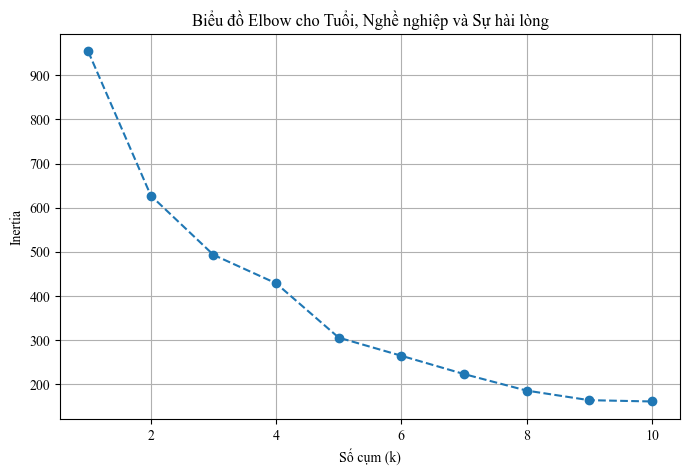

In [ ]:
# Vẽ biểu đồ Elbow để chọn số cụm tối ưu
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Biểu đồ Elbow cho Tuổi, Nghề nghiệp và Sự hài lòng')
plt.grid()
plt.show()

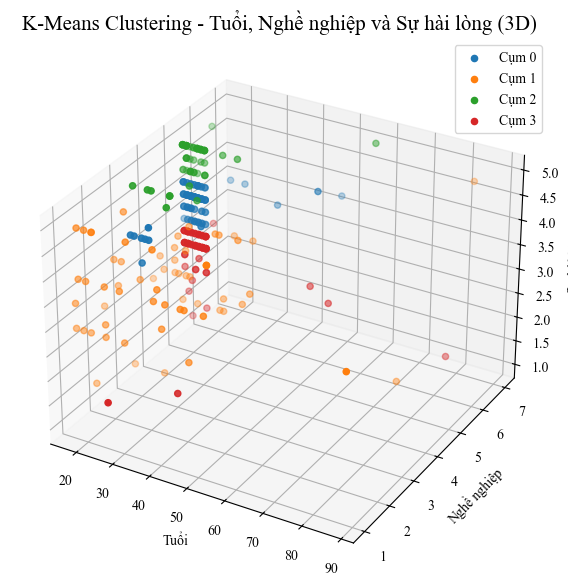

Tâm cụm sau khi giải chuẩn hóa:
[[21.67241379  4.92241379  3.91810345]
 [35.19047619  2.06349206  3.75793651]
 [22.20588235  4.83823529  4.85294118]
 [22.66197183  5.          2.85915493]]


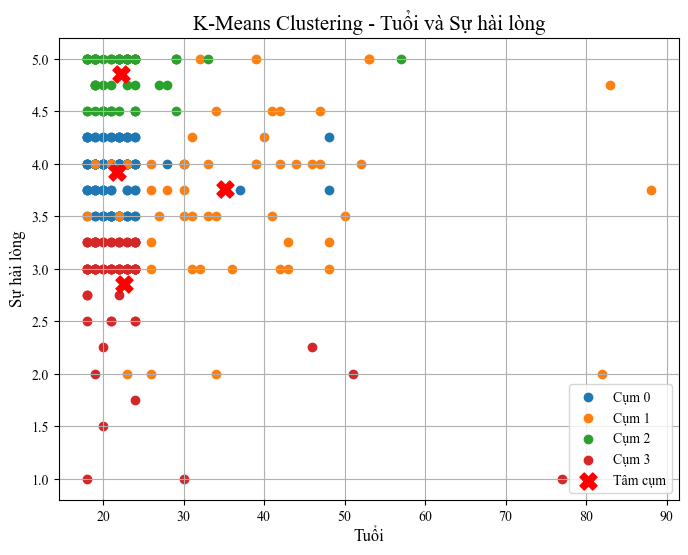

In [ ]:
optimal_k = 4 #Sau khi thử nghiệm cho thấy k = 4 cho ra kết quả Silhouette Score cao nhất
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_copy['Cụm'] = kmeans.fit_predict(scaled_data)

# Trực quan hóa kết quả phân cụm bằng biểu đồ 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Vẽ các cụm
for cluster in range(optimal_k):
    cluster_data = df_copy[df_copy['Cụm'] == cluster]
    ax.scatter(
        cluster_data['Tuổi mã hóa'],
        cluster_data['Nghề nghiệp mã hóa'],
        cluster_data['Điểm hài lòng(Trung bình)'],
        label=f'Cụm {cluster}'
    )

# Đặt tiêu đề và nhãn cho trục
ax.set_title('K-Means Clustering - Tuổi, Nghề nghiệp và Sự hài lòng (3D)', fontsize=15)
ax.set_xlabel('Tuổi')
ax.set_ylabel('Nghề nghiệp')
ax.set_zlabel('Sự hài lòng')
ax.legend()
plt.show()


# Trực quan hóa dữ liệu phân cụm theo ĐỘ TUỔI và SỰ HÀI LÒNG bằng biểu đồ 2D
plt.figure(figsize=(8, 6))

# Vẽ từng cụm
for cluster in range(optimal_k):
    cluster_data = df_copy[df_copy['Cụm'] == cluster]
    plt.scatter(
        cluster_data['Tuổi mã hóa'],
        cluster_data['Điểm hài lòng(Trung bình)'],
        label=f'Cụm {cluster}'
    )

# Vẽ tâm cụm
centroids = kmeans.cluster_centers_

# Đưa tâm cụm về thang đo ban đầu (giải chuẩn hóa)
centroids_original = scaler.inverse_transform(centroids)

# Kiểm tra các giá trị tâm cụm sau khi giải chuẩn hóa
print("Tâm cụm sau khi giải chuẩn hóa:")
print(centroids_original)

plt.scatter(
    centroids_original[:, 0], centroids_original[:, 2],
    s=150, c='red', marker='X', label='Tâm cụm'
)

plt.title('K-Means Clustering - Tuổi và Sự hài lòng', fontsize=15)
plt.xlabel('Tuổi', fontsize=12)
plt.ylabel('Sự hài lòng', fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [ ]:
#đánh giá chất lượng  phân cụm (clustering)
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3644823620583082


In [ ]:
# Tính phân phối độ tuổi theo từng cụm
age_distribution_by_cluster = df_copy.groupby(['Cụm', 'Tuổi']).size().unstack(fill_value=0)
# In kết quả phân phối độ tuổi theo cụm
print(age_distribution_by_cluster)

Tuổi  Trên 55 tuổi  Từ 18 đến 25 tuổi  Từ 26 đến 35 tuổi  Từ 36 đến 45 tuổi  \
Cụm                                                                           
0                0                111                  2                  1   
1                3                 17                 21                 13   
2                1                 60                  7                  0   
3                1                 67                  1                  0   

Tuổi  Từ 46 đến 55 tuổi  
Cụm                      
0                     2  
1                     9  
2                     0  
3                     2  


In [ ]:
# Tính phân phối nghề nghiệp theo từng cụm
job_distribution_by_cluster = df_copy.groupby(['Cụm', 'Nghề nghiệp']).size().unstack(fill_value=0)
# In kết quả phân phối nghề nghiệp theo cụm
print(job_distribution_by_cluster)
# Kiểm tra lại dữ liệu
df_first_last_columns = df_copy[df_copy.columns[3:5].tolist() + df_copy.columns[-1:].tolist()]
df_first_last_columns

Nghề nghiệp  Khác  Nhân viên bán thời gian  Nhân viên toàn thời gian  Nội trợ  \
Cụm                                                                             
0               0                        0                         7        1   
1              29                        8                        22        3   
2               0                        0                         6        2   
3               0                        1                         1        0   

Nghề nghiệp  Sinh viên  Thất nghiệp  Về hưu  
Cụm                                          
0                  103            4       1  
1                    0            0       1  
2                   58            1       1  
3                   65            3       1  


,Tuổi,Nghề nghiệp,Cụm
0,Từ 18 đến 25 tuổi,Sinh viên,0
1,Từ 18 đến 25 tuổi,Sinh viên,2
2,Từ 18 đến 25 tuổi,Sinh viên,0
3,Từ 18 đến 25 tuổi,Sinh viên,3
4,Từ 18 đến 25 tuổi,Sinh viên,0
...,...,...,...
313,Từ 18 đến 25 tuổi,Sinh viên,3
314,Từ 18 đến 25 tuổi,Nhân viên toàn thời gian,0
315,Từ 46 đến 55 tuổi,Nhân viên toàn thời gian,1
316,Từ 18 đến 25 tuổi,Sinh viên,0


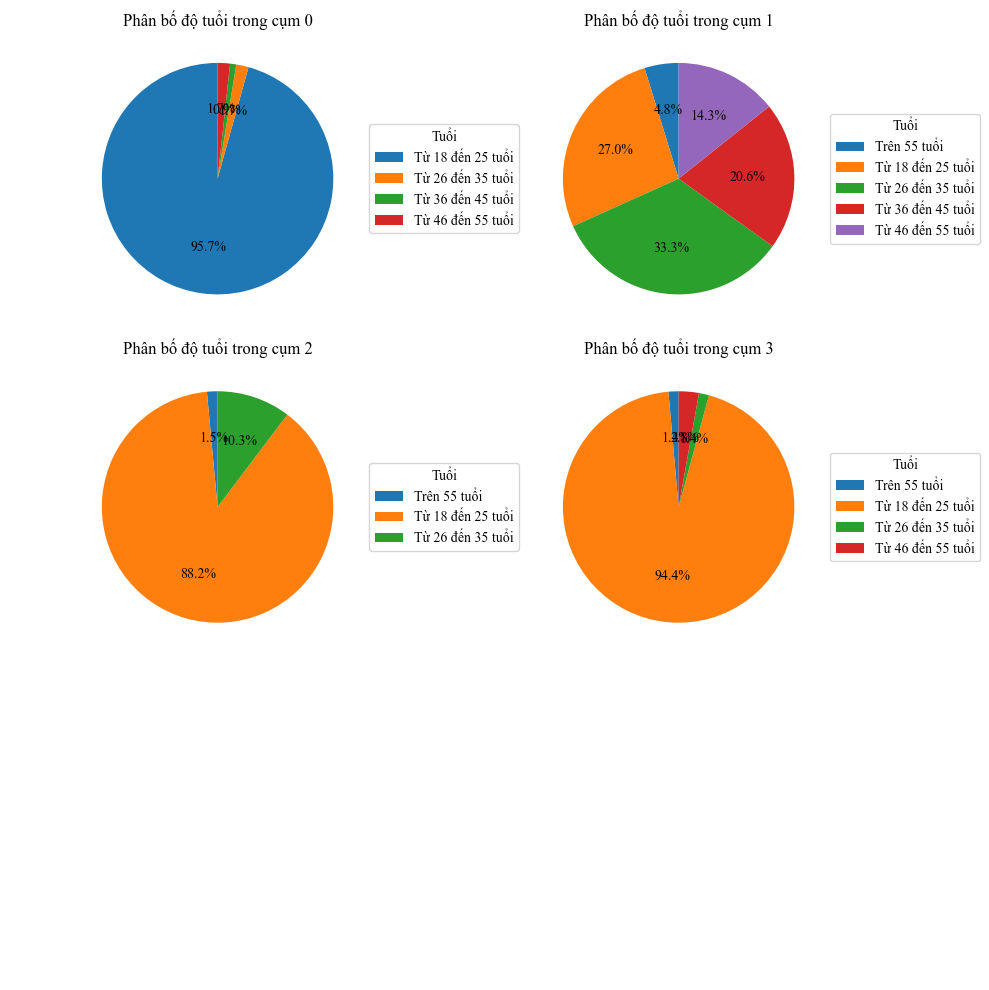

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for idx, cluster in enumerate(age_distribution_by_cluster.index):
    sizes = age_distribution_by_cluster.loc[cluster]
    sizes = sizes[sizes > 0]  # Lọc các giá trị không phải 0

    wedges, texts, autotexts = axes[idx].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, labeldistance=1.11)
    axes[idx].set_title(f'Phân bố độ tuổi trong cụm {cluster}')
    axes[idx].legend(wedges, sizes.index, title="Tuổi", loc="center left", bbox_to_anchor=(1, 0.5))
# Nếu có bất kỳ ô nào không sử dụng, ẩn trục tọa độ
for idx in range(len(age_distribution_by_cluster.index), len(axes)):
    axes[idx].axis('off')  # Ẩn trục đối với ô không sử dụng

# Tự động căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

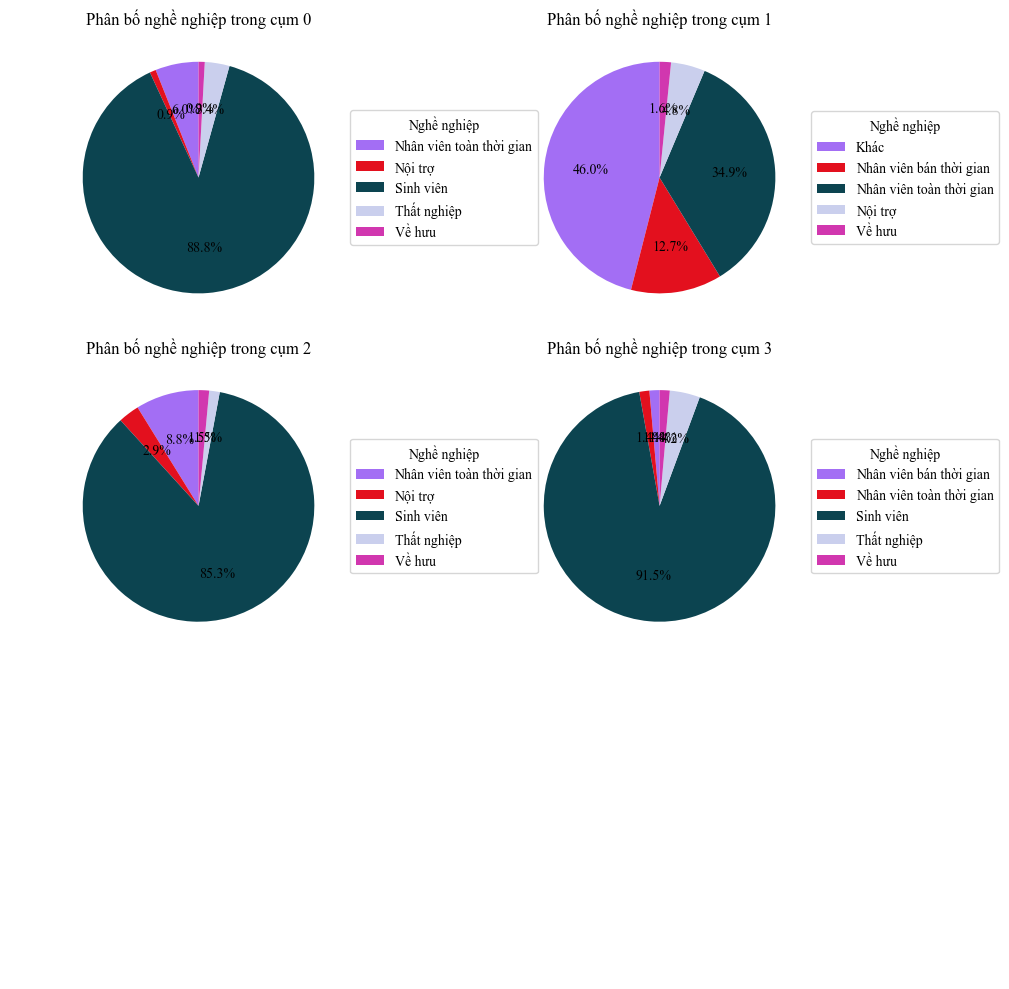

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))
axes = axes.flatten()

for idx, cluster in enumerate(job_distribution_by_cluster.index):
    sizes = job_distribution_by_cluster.loc[cluster]
    # Lọc các giá trị không phải 0
    sizes = sizes[sizes > 0]

    wedges, texts, autotexts = axes[idx].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90, colors=colors, labeldistance=1.11)
    axes[idx].set_title(f'Phân bố nghề nghiệp trong cụm {cluster}')

    # Đảm bảo chú thích được hiển thị cho mỗi biểu đồ
    axes[idx].legend(wedges, sizes.index, title="Nghề nghiệp", loc="center left", bbox_to_anchor=(1, 0.5))
for idx in range(len(age_distribution_by_cluster.index), len(axes)):
    axes[idx].axis('off')
# Tự động căn chỉnh và hiển thị biểu đồ
plt.tight_layout()
plt.show()

# <a name='Customer Satisfaction'></a>

<div style="border-radius:10px;
            background-color:plum;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:white; font-weight: bold; font-family: Cursive">
5. Random Forest Regression</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
# Tiền xử lý: Chuyển đổi dữ liệu phân loại thành số
# Note: Hàm này chuyển các giá trị phân loại (categorical) thành số để mô hình có thể xử lý.
def encode_column(column):
    return pd.factorize(column)[0]

# Loại bỏ hoặc chuyển đổi các cột không phù hợp
#  Đảm bảo tất cả các cột dữ liệu đầu vào đều ở dạng số.
for col in ["Giới tính", "Tuổi", "Nghề nghiệp", "Thu nhập hàng tháng", "Mức độ bận rộn", "Tần suất sử dụng"]:
    if col in df_khaosat_cleaned.columns:
        df_khaosat_cleaned[col] = encode_column(df_khaosat_cleaned[col])

# Kiểm tra và loại bỏ các cột không phải dạng số
# Note: Nếu cột là dạng ngày tháng thì chuyển đổi sang timestamp (dạng số), nếu không chuyển được thì loại bỏ.
for col in df_khaosat_cleaned.columns:
    if df_khaosat_cleaned[col].dtype == 'object':
        try:
            df_khaosat_cleaned[col] = pd.to_datetime(df_khaosat_cleaned[col]).astype(int) / 10**9
        except:
            df_khaosat_cleaned = df_khaosat_cleaned.drop(columns=[col])

# Sử dụng trung bình của các cột "Ý định dùng tiếp" làm mục tiêu
# Note: Kết hợp các câu hỏi liên quan đến "Ý định dùng tiếp" để tạo một biến đại diện duy nhất.
columns_for_mean = ["Ý định dùng tiếp 1", "Ý định dùng tiếp 2", "Ý định dùng tiếp 3", "Ý định dùng tiếp 4"]
df_khaosat_cleaned["Ý định dùng tiếp"] = df_khaosat_cleaned[columns_for_mean].mean(axis=1)

# Xác định biến đặc trưng (features) và mục tiêu (target)
# Note: Biến đặc trưng (features) là các yếu tố ảnh hưởng, còn mục tiêu (target) là "Ý định dùng tiếp".
features = df_khaosat_cleaned.drop(columns=columns_for_mean + ["Ý định dùng tiếp"])
target = df_khaosat_cleaned["Ý định dùng tiếp"]





In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra
# Note: Sử dụng 80% dữ liệu để huấn luyện mô hình, 20% để kiểm tra hiệu suất.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest Regressor
# Note: Sử dụng Random Forest để dự đoán giá trị liên tục của "Ý định dùng tiếp".
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

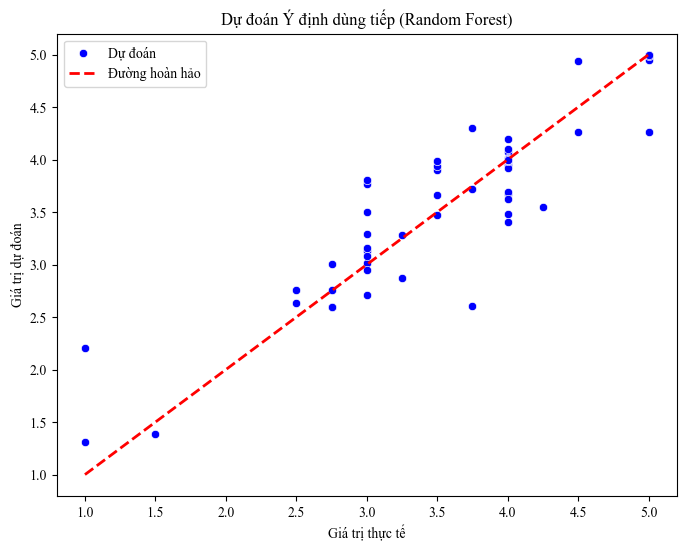

In [ ]:
# Trực quan hóa kết quả dự đoán
# Note: So sánh giá trị thực tế và dự đoán để kiểm tra hiệu suất mô hình.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", label="Dự đoán")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Đường hoàn hảo")
plt.xlabel("Giá trị thực tế")
plt.ylabel("Giá trị dự đoán")
plt.title("Dự đoán Ý định dùng tiếp (Random Forest)")
plt.legend()
plt.show()

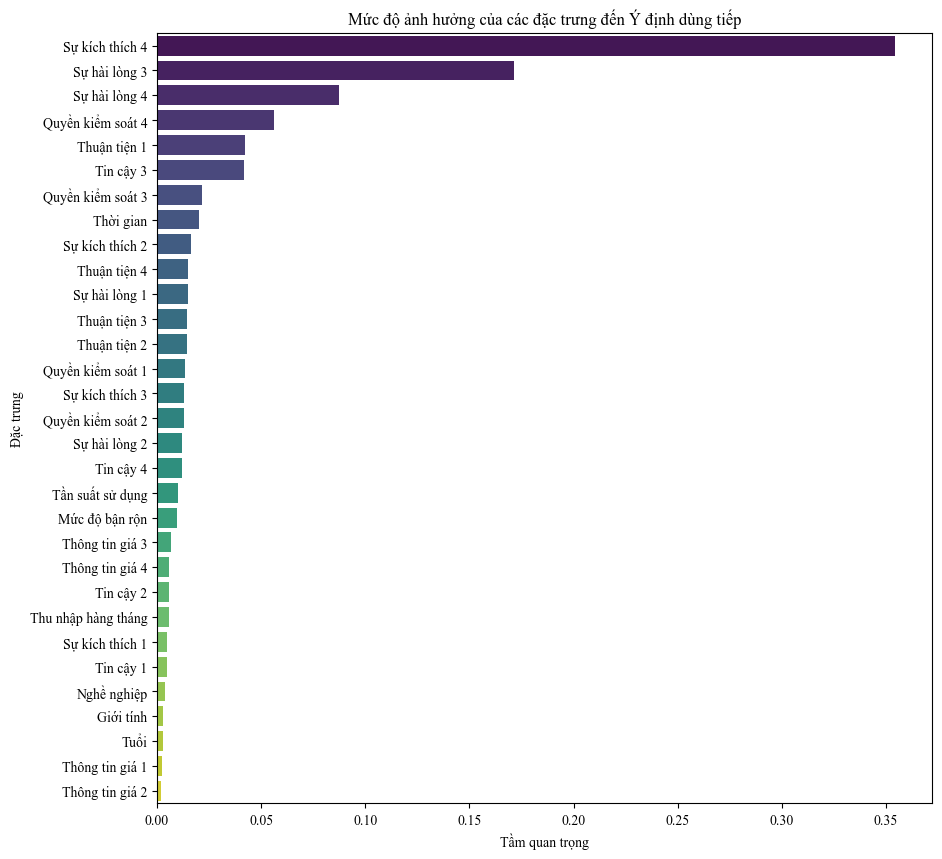

In [ ]:
# Trực quan hóa mức độ ảnh hưởng của các đặc trưng
# Note: Đo lường mức độ đóng góp của từng đặc trưng vào dự đoán của mô hình.
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Mức độ ảnh hưởng của các đặc trưng đến Ý định dùng tiếp")
plt.xlabel("Tầm quan trọng")
plt.ylabel("Đặc trưng")
plt.show()

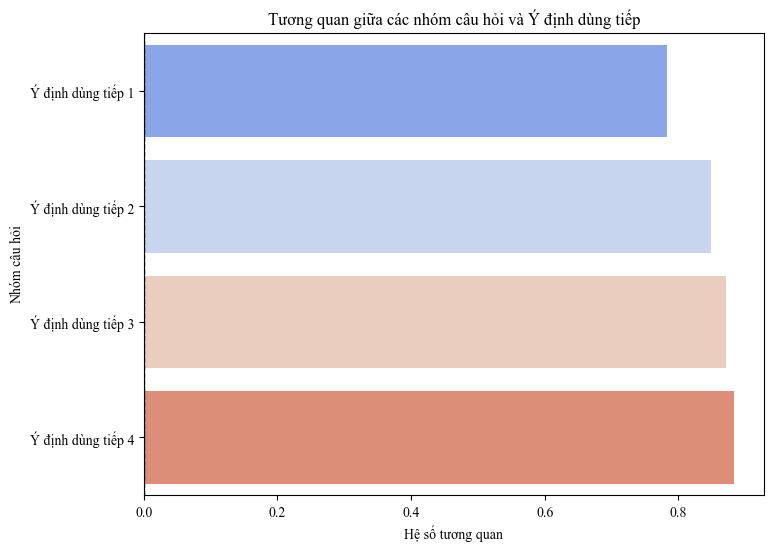

In [ ]:
# Phân tích ảnh hưởng của từng nhóm câu hỏi
# Note: Đánh giá tương quan giữa từng nhóm câu hỏi và mục tiêu để xem nhóm nào quan trọng hơn.
group_means = df_khaosat_cleaned[columns_for_mean]
correlation_with_target = group_means.corrwith(df_khaosat_cleaned["Ý định dùng tiếp"])

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette="coolwarm")
plt.title("Tương quan giữa các nhóm câu hỏi và Ý định dùng tiếp")
plt.xlabel("Hệ số tương quan")
plt.ylabel("Nhóm câu hỏi")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.show()


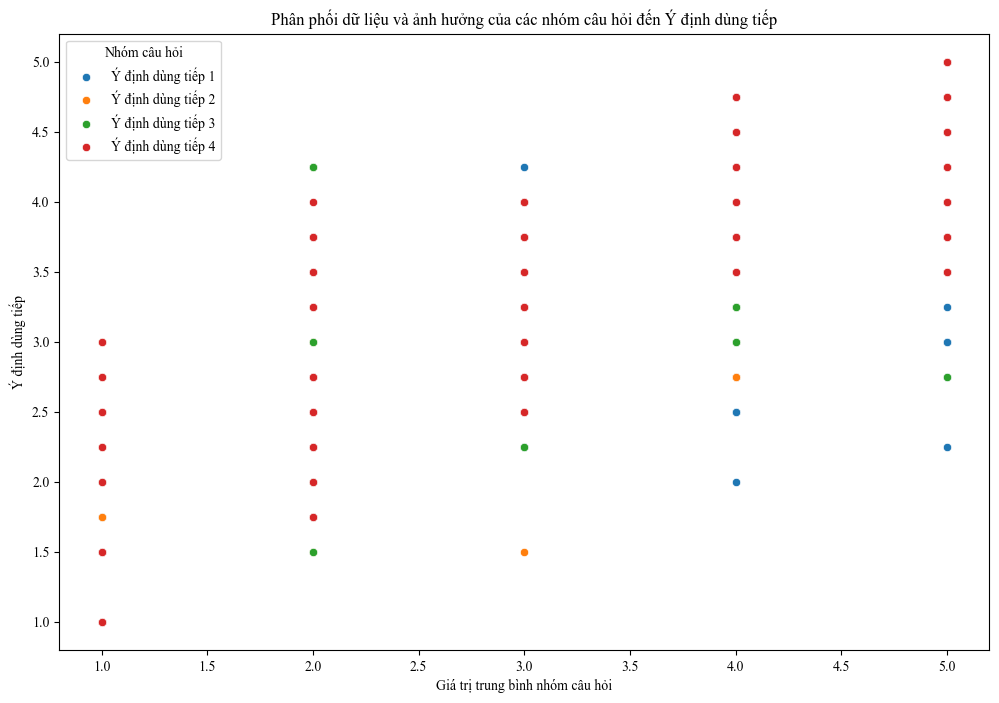

In [ ]:
# Trực quan hóa phân phối dữ liệu và ảnh hưởng từng nhóm
# Note: Xem xét mối quan hệ trực tiếp giữa từng nhóm câu hỏi và mục tiêu.
plt.figure(figsize=(12, 8))
for col in columns_for_mean:
    sns.scatterplot(x=df_khaosat_cleaned[col], y=df_khaosat_cleaned["Ý định dùng tiếp"], label=col)
plt.title("Phân phối dữ liệu và ảnh hưởng của các nhóm câu hỏi đến Ý định dùng tiếp")
plt.xlabel("Giá trị trung bình nhóm câu hỏi")
plt.ylabel("Ý định dùng tiếp")
plt.legend(title="Nhóm câu hỏi")
plt.show()

In [ ]:
# Đánh giá mô hình
# Note: MSE đo lường độ lệch trung bình bình phương giữa dự đoán và thực tế. R2 đo mức độ mô hình giải thích được biến động của dữ liệu.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.13
R-squared (R2): 0.85
